In [0]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
from urllib.request import urlopen


import numpy as np
import pandas as pd

from keras.datasets import mnist

import matplotlib.pyplot as plt
from scipy.stats import norm

from keras import backend as K

from keras.layers import Input, InputLayer, Dense, Lambda, Layer, Add, Multiply
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model, Sequential


from matplotlib.ticker import FormatStrFormatter
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG

from keras.utils import np_utils

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


import pandas.plotting
from pandas.plotting import scatter_matrix
from keras.utils import np_utils

from keras import regularizers

#html = urlopen('file://css/style.css')
#HTML(html.read().decode('utf-8'))

from keras.datasets import mnist
import numpy as np
import numpy as np
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import tensorflow as tf


# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [0]:
from IPython.core.display import HTML
HTML("""
<style>
h1
{
    color: white;
	text-align: center;
	background-color: #8ED64A;
	text-shadow: 2px 2px 4px #000000;
}

h2,h3,h4
{
    color: blue;
	text-align: left;
    text-decoration: underline;
}

body{
    background-image: url(images/fond.jpg);
}

*{
    margin: 0px;
    padding: 0px;
    font-family: Avenir, sans-serif;
}
#menu {
  list-style-type: none;
  position: fixed;
  right: 0;
  top: 30%;
  width: 15em;
  margin-top: 0em;
}
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}

</style>

""")

<html>
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width">
  <title>MathJax example</title>
  <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
  <script id="MathJax-script" async
          src="https://cdn.jsdelivr.net/npm/mathjax@3.0.1/es5/tex-mml-chtml.js">
  </script>
</head>
<body>
<h1>Visualisation de données massives par réduction de dimension non linéaire</h1>
<center>
    

<h6> Mariette DUPUY, Clément GUERIN, Maxime LABORDE </h6>
<img
    src="imageTer.jpg" 
    height="1500px" 
    width="800px" 
/>
</center>
    

<br/>


<ul id="menu">
    <li><a href="#intro" class="list-group-item list-group-item-action"> Introduction </a></li>
    <li><a href="#PrincipeAutoEncoder" class="list-group-item list-group-item-action">Principe de l' auto encoder</a></li>
    <li><a href="#exp_acp" class="list-group-item list-group-item-action">Explication ACP </a></li>
    <li><a href="#mes_ae_acp" class="list-group-item list-group-item-action">Mise en situation du lien entre l'auto encoder et l'ACP </a></li>
    <li><a href="#cr_quatre" class="list-group-item list-group-item-action"> Comparaison des résultats pour les quatre méthodes algorithmiques </a></li>
    <li><a href="#conclusion" class="list-group-item list-group-item-action">Conclusion </a></li>
</ul>
</body>
</html>

<h1 id="intro"> Introduction </h1>


$$\newcommand{\norme}[1]{\left\Vert #1\right\Vert}$$
$\newcommand{\reels}{\mathbb{R}}$
    
Avec l’augmentation importante de la puissance des ordinateurs ces dernières années ainsi que la multiplication de jeux de données ayant une taille conséquente, le Machine learning et le Deep learning sont devenus des domaines d’étude ayant une place de plus en plus importante.

La problématique associée à notre TER, du moins dans un premier temps, est d’étudier certaines catégories de ces algorithmes pour les comprendre et observer ainsi certains comportements lorsque l’on choisit des paramètres assez spécifiques. 

Nous nous sommes donc particulièrement intéressés aux algorithmes auto encodeurs qui sont des réseaux de neurones artificiels dont le but est, en partant de données d’entrée de pouvoir les reconstruire après une descente en dimension.

Nous comprenons donc que tout l’intérêt est de pouvoir observer l’efficacité d’une descente en dimension afin de faciliter l’exploitation et la compréhension de nos données. 

Nous nous sommes donc naturellement penchés sur les résultats que les autoencodeurs de type fully-connected et CNN peuvent fournir afin de les comparer avec ceux obtenus par une ACP et les algorithmes VAE. 

Dans ce rapport nous couvrirons donc les résultats que l’on peut obtenir sur trois bases de données différentes :

- celle des iris, très utilisée, c’est un jeu de données comportant peu de données (150) et en petite dimension (4). Il permettra d’étudier si un algorithme auto encodeur peut arriver à des résultats satisfaisants malgré le peu de données.

- celle de MNIST composée de 60 000 chiffres manuscrits servant à l’apprentissage de l’algorithme et 10 000 supplémentaires pour tester les résultats. Ces données sont donc sous la forme d’images de 28*28 pixels, ce qui donne des données en 784 dimensions.

- celle de Fashion MNIST composée de 60 000 images d'articles de mode servant à l’apprentissage de l’algorithme et 10 000 supplémentaires pour tester les résultats. Ces données sont donc sous la forme d’images de 28*28 pixels, ce qui donne des données en 784 dimensions.

Dans un premier temps nous allons décrire le principe d’un auto encodeur avant de le comparer à celui de l’ACP pour mettre en évidence des similarités, ces similirarités seront mises en avant sur la base de données IRIS. 

Dans un deuxième temps, nous nous intéressons aux deux jeux de données décrits précédemment : nous allons étudier les résultats que l'on peut obtenir sur cette base de données au travers de différentes méthodes : l'ACP, les auto-encodeurs fully connected, les CNN et les VAE et sur différentes dimensions : 2, 32, 128. Cette partie nous permettra de visualiser les réprésentation 2D des nuages de points ainsi que la reconstruction des images grâces aux différentes méthodes nommées précédemment.

<h1 id="PrincipeAutoEncoder"> Principes de l'autoencoder </h1>

Dans cette partie nous nous attacherons à expliquer de manière mathématique le principe de fonctionnement d'un auto encodeur. Nous illustrerons avec des exemples sur les bases de données iris et MNIST dans les parties suivantes. Le but étant de mettre en lumière des similarités avec l'ACP.

Dans toute la suite nous considérerons nos données sous la forme $(X_{i},Y_{i})$ avec $i\in {1,...,n}$


- $X_{1},...,X_{n}$  $ \in \reels^{p}\quad $ avec p la dimension de nos données (p=4 dans le cas des iris)

- $Y_{i}$ $ \in  {1,2,...,k} $ un ensemble de classe appelé l’étiquette de nos données.


La première étape pour mettre en place un auto encodeur consiste à extraire de nos données deux ensembles distincts : 

-	Un ensemble de données sur lesquelles l’algorithme va apprendre des règles de discrimination, appelé ensemble d’apprentissage.

-	Un second sur lequel nous vérifierons la qualité des règles obtenues lors de la première étape, à l’aide d’un calcul du pourcentage d’erreur commise et d’autres indicateurs pertinents.

Cependant mettre en place un auto encodeur ne s'arrête pas ici. En effet un réseau de neurones est composé de plusieurs couches de neurones et pour passer d’une couche à une autre il convient de choisir des règles de passage dont notamment des fonctions d’activations. Celles-ci peuvent être "linéaire", "sigmoid", "tangeante hyperbolique", ou autres. Ici nous nous intéresserons à des fonctions d'activation linéaires car c'est avec ces fonctions d'activation que les auto encodeurs possèdent de grandes similarités avec l'ACP. Ces fonctions d'activation sont notées $\sigma$.


On peut de plus décider du nombre de connexions que l’on veut établir entre les couches de neurones, le plus souvent on choisira l’option "fully-connected" qui connecte tous les neurones d’une couche à tous ceux de la suivante.

Finalement lorsque notre modèle a été configuré de la manière souhaitée il ne reste plus qu’à choisir convenablement deux derniers paramètres :

- Le nombre d’epochs qui représente le nombre de fois que l’on souhaite que l’algorithme parcourt l’ensemble des données. Par exemple un nombre d'epochs de 50 sur la base MNIST a pour conséquence que l’algorithme étudie 50 fois l’ensemble des 60 000 données de cette base.

- Le nombre de batch qui représente le nombre de données ou d’échantillons de données qu’il convient de parcourir avant de mettre à jour les paramètres du modèle. Lorsqu’un un batch est fini un calcul d’erreur va être effectué entre les valeurs estimées par l’algorithme pour les données étudiées et les valeurs réelles des données. A l’issue de cela le modèle va être ajusté en utilisant souvent une rétro propagation de l’erreur ou des variantes.

Maintenant que l'ensemble des informations nécessaires au fonctionnenement de l'auto encodeur ont été défninies ci-dessus nous allons pouvoir décrire plus en profondeur les trois grandes étapes pour tout auto encodeur.
    
<h2> Encodage </h2>

Dans un premier temps, en partant de nos données initiales de notre ensemble d'apprentissage, l'algorithme va appliquer une certaine fonction à nos données et leur rajouter un biais. Ainsi nous associerons à $X_{i}$ :

$X_{i} \to \sigma(W_{1}X_{i} + b_{1})$

- W1 représente donc une matrice qui est de taille d x p (avec d la dimension dans laquelle on souhaite descendre, dans le cas des iris nous choisirons d=2).

- $b_{1}  \in \reels^{d}\quad$ représente le biais.


A l'issue de cette étape nos données qui étaient initialement en dimension p ont été transfromées en données en dimension d.

Ce processus est repété avec des matrices et des biais potentiellement différents autant de fois que notre auto encodeur a de couche de neurones d'encodage.

Pour la fin de la description du principe général nous supposerons qu'il n'y a qu'une couche d'encodage, comme décrite ci-dessus.


<h2> Decodage </h2>

Ensuite dans un second temps il convient d'essayer de retrouver au mieux les informations initiales en décodant les données précédemment encodées. Pour cela de manière analogue à la partie précédente nous allons transformer les données obtenues à l'issue de l'encodage en appliquant de nouveau une fonction puis un biais.


$\sigma(W_{1}X_{i} + b_{1}) \to \sigma(W_{2}\sigma(W_{1}X_{i} + b_{1} ) + b_{2})$


- $W_{2}$ représente une matrice qui est de taille p x d (avec p la dimension initiale, dans le cas des iris nous avons p=4).

- $b_{2}$ $ \in \reels^{p}\quad $ représente le biais.

On peut réécrire cette equation sous la forme : $WX_{i}+b$ 
    

Avec : $W = W_{2}W_{1}$ 
et 
 $b=W_{2}b_{1}+b_{2}$

A l'issue de cette étape nous avons donc les données reconstruites.

<h2> Calcul d'erreur </h2>

Désormais il convient d'étudier la qualité de la solution obtenue. Une des méthodes les plus utilisées est celle du mean squared error qui consiste à essayer de minimiser la fonction suivante.
    


$$\frac{1}{n}\sum_{i=1}^{n}\norme{W_{2}(W_{1}X_{i}+b_{1})+b_{2}-X_{i}}^{2} $$

$$ \Longleftrightarrow $$ 

$$ \frac{1}{n}\sum_{i=1}^{n}\norme{WX_{i}+b-X_{i}}^{2} $$

Cette fonction est à minimiser sur ses arguments $W_{1}$, $W_{2}$, $b_{1}$ et $b_{2}$.
 

<h1 id="exp_acp">Explication ACP</h1>

$$\newcommand{\norme}[1]{\left\Vert #1\right\Vert}$$
$\newcommand{\reels}{\mathbb{R}}$
  
L'ACP peut être étudiée sous différentes formes. Dans un premier temps nous étudierons l'une des manières les plus intuitives pour expliquer le problème de l'ACP. Ensuite nous montrerons l'équivalence entre cette première manière de poser le problème de l'ACP et une seconde qui permet de faire apparaitre plus facilement le lien avec les auto encodeur.

De plus, dans cette partie nous allons remarquer que le problème qui a été posé dans la partie précédente possède une structure commune avec celui de l'ACP que nous allons décrire.

<h2> Une première manière intuitive de voir l'ACP </h2>

Pour présenter l'analyse en composante principale nous garderons les mêmes notations que précédemment (d est la dimension dans laquelle on souhaite descendre et p est la dimension initiale). 

De plus on considérera que l'on a des données centrées. Le but de l'analyse en composantes principales est de trouver d vecteurs orthogonaux entre eux et de norme 1 qui permettent de maximiser la variance des composantes principales. 

si d=2 on a :

$$ w^{1}\in \reels^{p}\quad$$
$$ w^{2}\in \reels^{p}\quad$$


 avec $\langle w^{1},w^{2}\rangle = 0 $ car ils doivent être orthogonaux

    
La formule à maximiser est la suivante :


$$\displaystyle \max_{w^{1}} \frac{1}{n}\sum_{i=1}^{n}\langle X_{i},w^{1}\rangle^{2}$$


Or on a que :



$$\langle Xi,w^{1}\rangle^{2} $$
$$\Longleftrightarrow$$
$$ w^{1 t} X_{i} X_{i}^{t} w^{1} $$



En conséquence nous avons que

$$\displaystyle \max_{w^{1}} \frac{1}{n}\sum_{i=1}^{n}\langle X_{i},w^{1}\rangle^{2}$$ $$\Longleftrightarrow$$
$$\displaystyle \max_{w^{1}} \frac{1}{n}\sum_{i=1}^{n} w^{1 t} X_{i} X_{i}^{t} w^{1} $$
$$\Longleftrightarrow$$
$$ \displaystyle \max_{w^{1}} w^{1 t} \Sigma w^{1} $$


avec $\Sigma$ la matrice de covariance.


Ce problème revient donc à une recherche des vecteurs propres associés aux plus grandes valeurs propres de la matrice de covariance. Donc on peut formuler le problème de l’ACP comme un problème de diagonalisation de matrice de covariance, où le but est de maximiser la variance des Composantes Principales.

Il faut bien évidemment faire de même avec $w^{2}$.


<h2> Une autre manière de voir l'ACP qui permet de faire apparaître le lien avec les auto encoder </h2>

Dans cette manière d'aborder l'ACP , l'objectif est de minimiser l'expression suivante : 

$$\frac{1}{n}\sum_{i=1}^{n}\norme{\langle X_{i},w^{1}\rangle w^{1}  + \langle X_{i},w^{2}\rangle w^{2} - X_{i} } ^{2}$$

Ce qui est équivalent à minimiser : 

    
$$\norme{\langle X_{i},w^{1}\rangle w^{1}  + \langle X_{i},w^{2}\rangle w^{2} - X_{i} } ^{2} $$


Nous allons montrer l'équivalence entre les deux versions de l'ACP .



$$\displaystyle \min_{w^{1},w^{2}} \frac{1}{n}\sum_{i=1}^{n}\norme{\langle X_{i},w^{1} \rangle w^{1} + \langle X_{i},w^{2} \rangle w^{2} - X_{i} }^{2} $$

$$ \Longleftrightarrow $$ 

$$ \displaystyle \min_{w^{1},w^{2}} \norme{\langle X_{i},w^{1} \rangle w^{1}}^{2} + \norme{\langle X_{i},w^{2} \rangle w^{2}}^{2} +\norme{X_{i}}^{2}  
+2\langle \langle X_{i},w^{1} \rangle w^{1},\langle X_{i},w^{2} \rangle w^{2} \rangle 
-2\langle \langle X_{i},w^{1} \rangle w^{1},X_{i}\rangle 
-2\langle \langle X_{i},w^{2} \rangle w^{2},X_{i}\rangle $$

$$ \Longleftrightarrow $$ 

$$ \displaystyle \min_{w^{1},w^{2}} \norme{\langle X_{i},w^{1} \rangle }^{2} + \norme{\langle X_{i},w^{2} \rangle}^{2} +\norme{X_{i}}^{2}  
+2 \langle X_{i},w^{1} \rangle \langle X_{i},w^{2} \rangle \langle w^{1},w^{2} \rangle
-2\langle w^{1}w^{1 t} X_{i}  ,X_{i}\rangle 
-2\langle w^{2}w^{2 t} X_{i} ,X_{i}\rangle $$ 


or $2 \langle X_{i},w^{1} \rangle \langle X_{i},w^{2} \rangle \langle w^{1},w^{2} \rangle = 0 $


car $ \langle  w^{1} ,w^{2}\rangle = 0  $ (orthogonalité)

$$ \Longleftrightarrow $$ 



$$ \displaystyle \min_{w^{1},w^{2}} \langle \langle w^{1},X_{i} \rangle,\langle w^{1},X_{i} \rangle \rangle  + \langle \langle w^{2},X_{i} \rangle,\langle w^{2},X_{i} \rangle \rangle +\norme{X_{i}}^{2}  
-2 X_{i}^{t} w^{2} w^{2_t} X_{i}
-2 X_{i}^{t} w^{1} w^{1_t} X_{i} $$

$$ \Longleftrightarrow $$ 

$$\displaystyle \min_{w^{1},w^{2}} \langle X_{i}^{t}w^{1} ,X_{i}^{t}w^{1} \rangle  + \langle X_{i}^{t}w^{2} ,X_{i}^{t}w^{2} \rangle +\norme{X_{i}}^{2}  
-2 X_{i}^{t} w^{2} w^{2_t} X_{i}
-2 X_{i}^{t} w^{1} w^{1_t} X_{i}$$

$$ \Longleftrightarrow $$ 

$$ \displaystyle \min_{w^{1},w^{2}} w^{1 t}X_{i} X_{i}^{t} w^{1}   + w^{2 t}X_{i} X_{i}^{t} w^{2}  +\norme{X_{i}}^{2}  
-2 \langle w^{1},X_{i} \rangle \langle X_{i},w^{1} \rangle
-2 \langle w^{2},X_{i} \rangle \langle X_{i},w^{2} \rangle $$


$$ \Longleftrightarrow $$ 

$$ \displaystyle \min_{w^{1},w^{2}} w^{1 t} X_{i} X_{i}^{t} w^{1} +w^{2 t} X_{i}X_{i}^{t} w^{2}  +\norme{X_{i}}^{2}  
-2  w^{1 t}X_{i} X_{i}^{t} w^{1}
-2  w^{2 t}X_{i} X_{i}^{t} w^{2} $$


$$ \Longleftrightarrow $$ 

$$ \displaystyle \min_{w^{1},w^{2}}  -  w^{2 t}X_{i} X_{i}^{t} w^{2} -  w^{1 t}X_{i} X_{i}^{t} w^{1}+\norme{X_{i}}^{2}$$

$$ \Longleftrightarrow $$

$$ \displaystyle \max_{w^{1},w^{2}}  w^{2 t}X_{i} X_{i}^{t} w^{2} +  w^{1 t}X_{i} X_{i}^{t} w^{1}-\norme{X_{i}}^{2} $$

$$ \Longleftrightarrow $$

$$ \displaystyle \max_{w^{1},w^{2}}  \frac{1}{n}\sum_{i=1}^{n} w^{2 t}X_{i} X_{i}^{t} w^{2} +  w^{1 t}X_{i} X_{i}^{t} w^{1} $$


$$ \Longleftrightarrow $$ 

$$\displaystyle \max_{w^{1}} w^{1 t} \Sigma w^{1}  + \displaystyle \max_{w^{2}} w^{2 t} \Sigma w^{2} $$


Cette démonstration montre une équivalence entre les deux approches de l'ACP.

<h2> Lien entre auto encoder et ACP </h2>

Une de nos problématiques est de démontrer l'équivalence suivante ;

<center>
Autoencoder $\Longleftrightarrow$ ACP
</center>

Pour observer un lien entre ces méthodes il est important de simplifier la deuxième formule de l'ACP.



$$ \norme{\langle X_{i},w^{1}\rangle w^{1}  + \langle X_{i},w^{2}\rangle w^{2} - X_{i} } ^{2} $$

$$ \Longleftrightarrow $$ 

$$ \norme{w^{1}w^{1 t}X_{i}   + w^{2}w^{2 t}X_{i} - X_{i} } ^{2} $$

$$ \Longleftrightarrow\ $$

$$\norme{(w^{1}w^{1 t}+ w^{2}w^{2 t})X_{i} - X_{i} } ^{2} $$



On pose $W = w^{1} w^{1 t} + w^{2}w^{2t}$. Avec W une matrice de rang 2.
On en conclut donc qu'il faut minimiser dans cette version la formule suivante : 


$$\frac{1}{n}\sum_{i=1}^{n}\norme{WX_{i}-X_{i}}^{2} $$ 
  


L'auto encoder lui a pour objectif de minimiser la formule suivante :


$$\frac{1}{n}\sum_{i=1}^{n}\norme{WX_{i}+b-X_{i}}^{2}$$.


On peut donc constater que les deux formules sont similaires à un biais près.

L' ACP optimise sur des espaces très contraints tandis que l'auto encoder optimise sans contrainte, il ne rencontre aucun problème d'orthogonalité. 


La matrice W dans le cas de l'auto encoder peut-être de rang 2 ou de rang 1. Alors que dans le cas de l'ACP W ne peut être que de rang 2.



<table>
  <tr>
    <td>auto encoder</td>
    <td>ACP</td>
  </tr>
  <tr>
    <td>rang=1 ou rang=2</td>
    <td>rang=2 </td>
  </tr>
</table>

Il est important donc de considérer dans le cas de l'AutoEncoder que la matrice W est de rang 2 pour retrouver des similitudes entre les deux méthodes car en algèbre, résoudre un problème de matrice de rang 2 revient à le résoudre à l'aide de l'ACP. 


<h1 id="mes_ae_acp"> Mise en situation du lien entre l'auto encoder et l'ACP </h1>

<h2>Jeu de donnée n$^{\circ}$1 : Iris </h2>

<p>
Dans cette section nous allons appliquer plusieurs fonctions d'activation dans notre algorithme d'auto encoder. 
Nous nous sommes donnés comme but de descendre en dimension 2 (sachant que la dimension d'entrée des données est 4) et d'afficher à l'aide d'un nuage de points les différentes classes de fleurs, grâce aux coefficients récupérés lors de cette descente en dimension. 

Tout d'abord il faut savoir que nous avons décidé de ne pas centrer nos données pour pratiquer l'auto encoder mais que nous les avons centrées pour l'ACP. C'est dans ce cas et en ajoutant des fonctions d'activation de type "linear" en entrée et en sortie que les représentations des classes sont les plus ressemblantes (à rotation, échelle et centrage près qui ne perturbent pas l'auto encoder). 
   

In [0]:
iris = datasets.load_iris()
data= iris.data
data.shape
labels = np.array(iris.target)
labels.shape

X=iris.data
y=iris.target

x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(X,y,test_size=0.5)
y_test_classes = y_test_iris

In [0]:
#fonction autoencoder
def autoencoder_iris(p,entree,sortie):
        
    encoding_dim = p  #on passe de 4 à 2 

    input_img = Input(shape=(4,))

    encoded = Dense(encoding_dim, activation=entree)(input_img)

    decoded = Dense(4, activation=sortie)(encoded)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    encoded_input = Input(shape=(encoding_dim,))
 
    decoder_layer = autoencoder.layers[-1]

    decoder = Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

    x_train = (x_train_iris.astype('float32'))
    x_test = (x_test_iris.astype('float32'))

    autoencoder.fit(x_train, x_train,
                    epochs=500,
                    batch_size=10,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)

    encoded_imgs = encoder.predict(x_train) #coefficients en 2 dimensions 
    decoded_imgs = decoder.predict(encoded_imgs) #coefficients apres decodage 
    colormap=np.array(['r','g','b'])
    plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c = colormap[y_train_iris])
    plt.style.use('seaborn')
    plt.title("Nuage de points de la descente en dimension 2 pour l'autoencoder",fontsize=15,color="blue")
    plt.xlabel('Axe 1',fontsize=15,color="darkred")
    plt.ylabel('Axe 2',fontsize=15,color="darkred")
    plt.show()

In [0]:
#fonction ACP
def acp_iris() :                  
    means = np.mean(x_train_iris, axis=0)
    stds = np.std(x_train_iris, axis=0)

    PCAdata = x_train_iris-means

    cov = np.matmul(PCAdata.transpose(), PCAdata) / (PCAdata.shape[0] - 1)
    eig, axes = np.linalg.eig(cov)

    pc2d = np.matmul(PCAdata, axes[:, 0:2])
    pc1 = np.array(pc2d[:, 0].transpose())
    pc2 = np.array(pc2d[:, 1].transpose())
    colormap=np.array(['r','g','b'])
    plt.scatter(pc1, pc2, c=colormap[y_train_iris])
    plt.style.use('seaborn')
    plt.title("Nuage de points de la descente en dimension 2 pour l'ACP",fontsize=15,color="blue")
    plt.xlabel('Axe 1',fontsize=15,color="darkred")
    plt.ylabel('Axe 2',fontsize=15,color="darkred")
    plt.show()

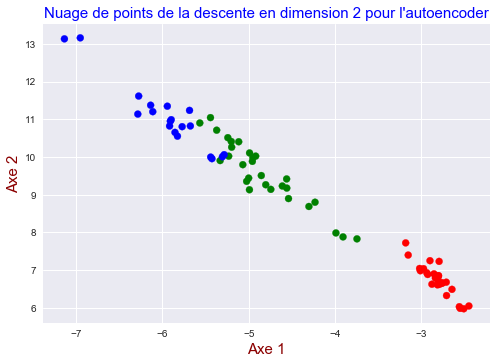

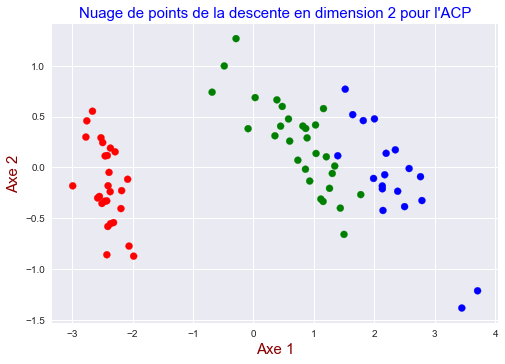

In [0]:
autoencoder_iris(2,'linear','linear')   
acp_iris()

Nous allons maintenant changer la fonction d'activation d'entrée par la fonction "sigmoid". Cette fonction renvoie les données entre 0 et 1. Ce qui nous donne comme on peut le voir sur les graphiques suivants une représentation assez différente de celle de l'ACP. On voit très directement l'effet des fonctions d'activation d'entrée. Nous avons un coefficient de perte de 0.13 ce qui est assez bon. 

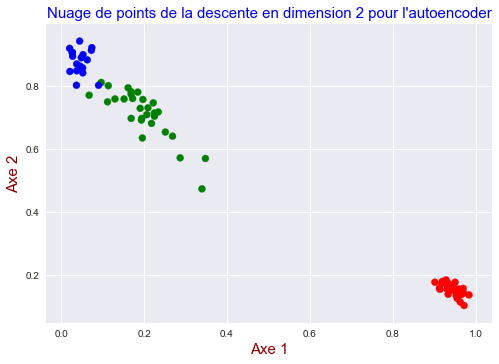

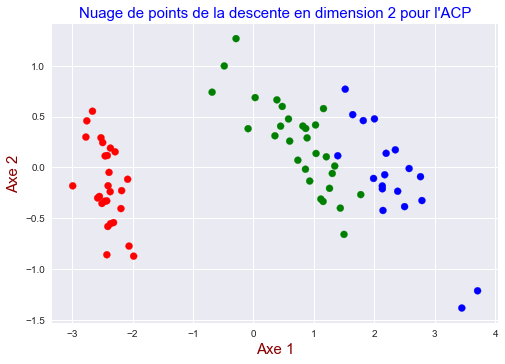

In [0]:
autoencoder_iris(2,'sigmoid','linear') 
acp_iris()

Nous désirons ensuite montrer que si l'on change la fonction d'activation de sortie le graphique sera encore une fois différent. Nous avons donc choisi la fonction "sigmoid" en entrée et en sortie.  

En effet, la stratégie d'optimisation se trompe totalement, car nous essayons d'avoir des données entre 0 et 1 en sortie ; cependant nos données sont des longueurs et des largeurs de parties de la fleur qui ne sont pas entre 0cm et 1cm. C'est pourquoi le coefficient de perte est bien plus mauvais : 9.91.

C'est pourquoi nous pouvons assurer que la descente est dépendante de la remontée. L’ensemble des coefficients est affecté si on change la fonction d'activation de sortie. 


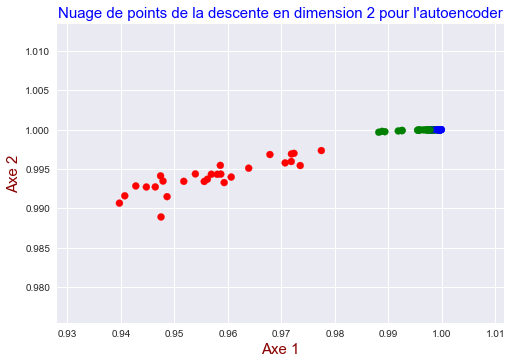

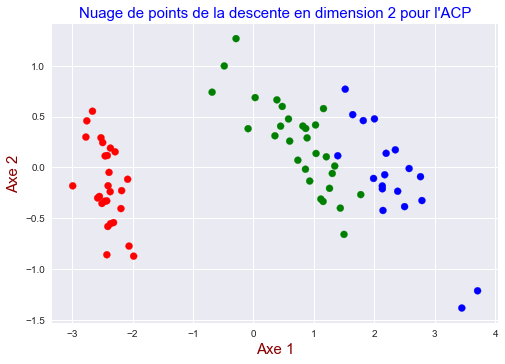

In [0]:
autoencoder_iris(2,'sigmoid','sigmoid')
acp_iris()

Nous retrouvons bien de manière informatique le lien que nous avons évoqué dans la partie théorique, entre l'autoencoder linéaire et l'ACP. 
Nous avions également fait des simulations sur la base de données MNIST, ces résulats sont à retrouver dans le pré-rapport. 

Nous pouvons passer maintenant aux résultats calculés sur les différents algorithmes en plusieurs dimensions sur les deux bases de données. 

<h1 id="cr_quatre"> Comparaison des résultats pour les quatre méthodes algorithmiques </h1>

<h2> Jeu de donnée n$^{\circ}$2 : MNIST </h2>

Désormais nous nous intéressons au jeu de données MNIST. 
Nous allons étudier les résultats que nous pouvons obtenir sur cette base de données au travers de différentes méthodes : l'ACP, les auto-encodeurs fully connected, les CNN et les VAE (nous expliquerons le principe de ces deux derniers un peu plus tard dans ce rapport). 
Les résultats d'intérêts à comparer entre les méthodes sont les suivants : l'erreur quadratique moyenne (MSE), celle-ci sera calculé aussi bien sur l'ensemble d'entrainement que sur l'ensemble de test. 
De plus nous observerons les visualisations des données obtenues lorsque nous essayons de réaliser des descentes en dimensions.
Ensuite nous comparerons la qualité des reconstructions d'images entre les différentes méthodes. Nous étudierons ces résultats pour trois valeurs de p diférentes (2, 32, 128), p étant la dimension de descente.  

<h3> Définition des ensembles test et train </h3>

Dans un premier temps, afin de s'assurer que tous les résultats obtenus peuvent être comparés entre eux, nous définirons des ensembles d'entrainements et de tests communs à toutes les méthodes.

In [0]:
(x_train_initial, y_train_initial), (x_test_initial, y_test_initial) = mnist.load_data()

x_train = x_train_initial.astype('float32') / 255.
x_test = x_test_initial.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

<h3> Etude en dimension 2</h3>

<h4> Approche par ACP</h4>

La valeur du MSE calculée sur l'ensemble train pour la dimension  2  est la suivante :  1648.812
La valeur du MSE calculée sur l'ensemble test pour la dimension  2  est la suivante :  672.6776
Nous affichons ensuite le nuage de points associé à l'ACP


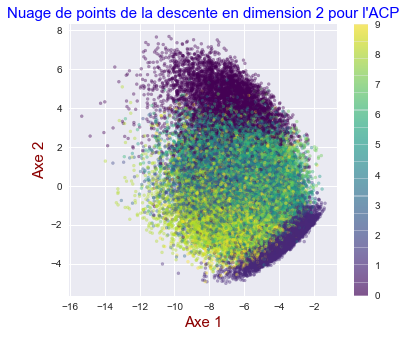

Nous avons ensuite affiché la reconstruction des images, la première ligne correspond aux images originales tandis que la deuxième correspond aux images reconstruites.


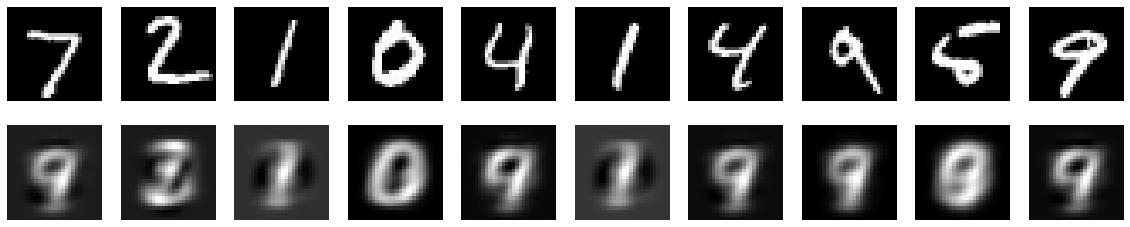

In [0]:
#approche ACP 
p=2
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

PCAdata = x_train 

cov = np.matmul(PCAdata.transpose(), PCAdata) / (PCAdata.shape[0] - 1)
eig, axes = np.linalg.eig(cov)


pc2d = np.matmul(PCAdata, axes[:, 0:2])
pc1 = np.array(pc2d[:, 0].transpose())
pc2 = np.array(pc2d[:, 1].transpose())


#calcul MSE sur x_train
tab_X = []
for i in range(0,60000):
    sum=0
    A=x_train[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_X.append(means + sum)
    
MSE = np.mean(np.linalg.norm(tab_X-x_train))
print("La valeur du MSE calculée sur l'ensemble train pour la dimension ",p," est la suivante : ", MSE)


#calcul MSE sur x_test
tab_MSE_test = []
for i in range(0,10000):
    sum=0
    A=x_test[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_MSE_test.append(means + sum)
    
MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
print("La valeur du MSE calculée sur l'ensemble test pour la dimension ",p," est la suivante : ", MSE_test)


print("Nous affichons ensuite le nuage de points associé à l'ACP")
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(pc1, pc2, c=y_train_initial, alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.style.use('seaborn')
plt.title("Nuage de points de la descente en dimension 2 pour l'ACP",fontsize=15,color="blue")
plt.xlabel('Axe 1',fontsize=15,color="darkred")
plt.ylabel('Axe 2',fontsize=15,color="darkred")
plt.savefig("m_acp_2.png")
plt.show()


print("Nous avons ensuite affiché la reconstruction des images, la première ligne correspond aux images originales tandis que la deuxième correspond aux images reconstruites.")
#recontruction des images 
mu = x_test.mean(axis=0)
U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
Zpca = np.dot(x_test - mu, V.transpose())
Rpca_m_2 = np.dot(Zpca[:,:2], V[:2,:]) + mu    # reconstruction

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Rpca_m_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("r_m_acp_2.png")
plt.show()

<h4> Fully connected </h4>

In [0]:
def autoencoder(p,entree,sortie):
    
    autoencoder = Sequential()
    input_dim = 784
    
    encoding_dim=p
    
    # Encoder Layers
    autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation=entree))
    autoencoder.add(Dense(2 * encoding_dim, activation=entree))
    autoencoder.add(Dense(encoding_dim, activation=entree))

    # Decoder Layers
    autoencoder.add(Dense(2 * encoding_dim, activation=entree))
    autoencoder.add(Dense(4 * encoding_dim, activation=entree))
    autoencoder.add(Dense(input_dim, activation=sortie))



    input_img = Input(shape=(input_dim,))
    encoder_layer1 = autoencoder.layers[0]
    encoder_layer2 = autoencoder.layers[1]
    encoder_layer3 = autoencoder.layers[2]
    encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

 

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy');
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_test, x_test),
                   verbose=0);

    encoded_imgs_test_FC = encoder.predict(x_test)
    encoded_imgs_train_FC = encoder.predict(x_train)
    decoded_imgs_m_FC_2 = autoencoder.predict(x_test)
    decoded_imgs_train_FC = autoencoder.predict(x_train)
    
    MSE_train_FC= np.mean(np.linalg.norm(decoded_imgs_train_FC-x_train))
    print("Le MSE calculé sur l'ensemble train pour un p=", p ,"est de ",MSE_train_FC)
    
    MSE_test_FC= np.mean(np.linalg.norm(decoded_imgs_m_FC_2-x_test))
    print("Le MSE calculé sur l'ensemble test pour un p=", p ,"est de ",MSE_test_FC)

    
    if p==2 :
        
        fig, ax = plt.subplots(figsize=(6, 5))
        cbar = ax.scatter(encoded_imgs_train_FC[:, 0], encoded_imgs_train_FC[:, 1], c=y_train_initial, alpha=.4, s=3**2, cmap='viridis')
        fig.colorbar(cbar, ax=ax)
        plt.style.use('seaborn')
        plt.title("Nuage de points de la descente en dimension 2 pour l'autoencoder fully connected pour l'ensemble train",fontsize=15,color="blue")
        plt.xlabel('Axe 1',fontsize=15,color="darkred")
        plt.ylabel('Axe 2',fontsize=15,color="darkred")
        plt.show()
        
        fig, ax = plt.subplots(figsize=(6, 5))
        cbar = ax.scatter(encoded_imgs_test_FC[:, 0], encoded_imgs_test_FC[:, 1], c=y_test_initial, alpha=.4, s=3**2, cmap='viridis')
        fig.colorbar(cbar, ax=ax)
        plt.style.use('seaborn')
        plt.title("Nuage de points de la descente en dimension 2 pour l'autoencoder fully connected pour l'ensemble test",fontsize=15,color="blue")
        plt.xlabel('Axe 1',fontsize=15,color="darkred")
        plt.ylabel('Axe 2',fontsize=15,color="darkred")
        plt.savefig("m_fc_2.png")
        plt.show()
        

    print("Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.")
    #recontruction des images 
    plt.figure(figsize=(9,3))
    toPlot = (x_test, decoded_imgs_m_FC_2)
    for i in range(10):
        for j in range(2):
            ax = plt.subplot(2, 10, 10*j+i+1)
            plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                       vmin=0, vmax=1)
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    if p==2 :
        plt.savefig("r_m_fc_2.png")
        
    plt.tight_layout()

Le MSE calculé sur l'ensemble train pour un p= 2 est de  1534.8085
Le MSE calculé sur l'ensemble test pour un p= 2 est de  627.4844


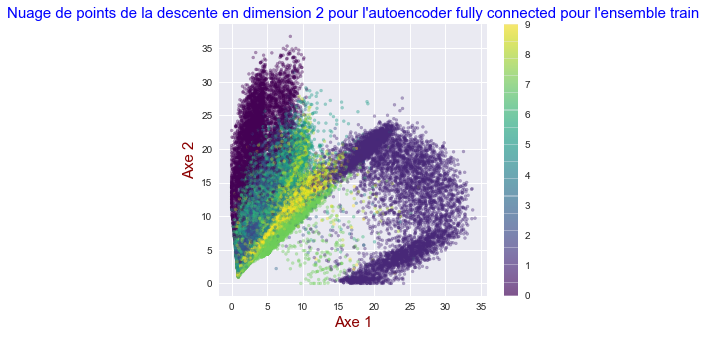

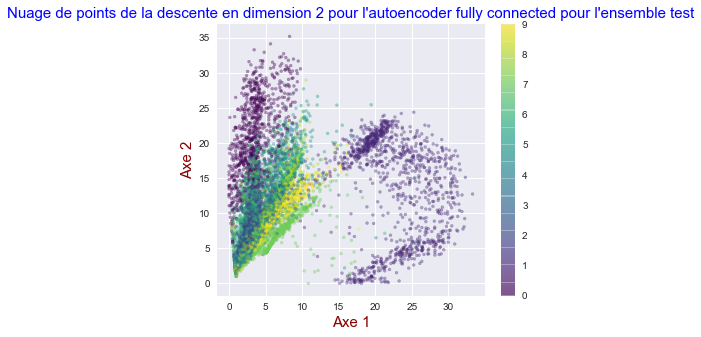

Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.


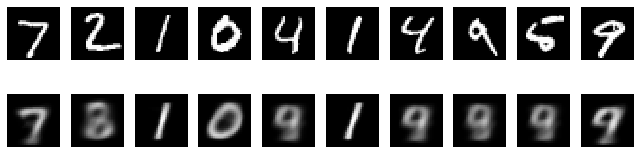

In [0]:
autoencoder(2,'relu','sigmoid') 

<h4> Réseaux de neurones convolutifs : les CNN </h4>

Par la suite nous nous intéressons aux réseaux de neurones convolutifs. Nous souhaitons tout comme dans les parties précédentes calculer le MSE associé à cette méthode pour trois valeurs de p différentes et ainsi les comparer aux méthodes précédemment utilisées. De plus nous afficherons la représentation en deux dimensions de nos données obtenue avec cette méthode et nous la comparerons à celles obtenues précédemment. 

Mais tout d'abord présentons en quoi consiste les réseaux de neurones convolutifs :

Ces réseaux de neurones sont tout d'abord construits de manière similaire aux réseaux de neurones vus précédemment. Ainsi il convient de déterminer des fonctions d'activations, un nombre d'epochs, un nombre de batch, ainsi que des fonctions de perte qui serviront à entrainer le modèle. 

Cependant la différence réside dans le fait que lors de la définition de la partie encodage et décodage des convolutions sont effectuées ainsi que des opérations dites de max-pooling. 

Les convolutions consistent à choisir une taille de noyau, à parcourir nos images et à appliquer des filtres dessus. De plus nous pouvons choisir d'appliquer plusieurs filtres à chaque couches.

Une fois que ces couches ont été executées un biais est ajouté.

Le max-pooling consiste à réduire la dimension de l'image en regardant un sous-ensemble souvent de taille $2*2$ et à associer à ce sous-ensemble une unique valeur qui est la valeur la plus élevée du sous-ensemble.

Ainsi une image de taille $28*28$ par exemple après une opération de max-pooling (2,2) deviendra une image de taille $14*14$. 

Ce procédé est donc spécifique au traitement d'images.

Nous allons donc nous intéresser aux résultats que nous pouvons obtenir avec cette méthode.

In [0]:
x_train_cnn = x_train.reshape((len(x_train), 28, 28, 1))
x_test_cnn = x_test.reshape((len(x_test), 28, 28, 1))

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(2, (3, 3), strides=(2,2), activation='relu', padding='same'))


# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((1, 1, 2)))

# Decoder Layers
autoencoder.add(Conv2D(2, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()



Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 4, 4, 8)         

Le MSE calculé sur l'ensemble train pour la dimension 2 est de  1587.711
Le MSE calculé sur l'ensemble test pour la dimension 2 est de  648.8441
Nous affichons les deux nuages de points sur respectivement sur les ensembles test et train.


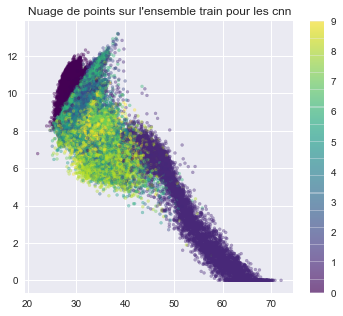

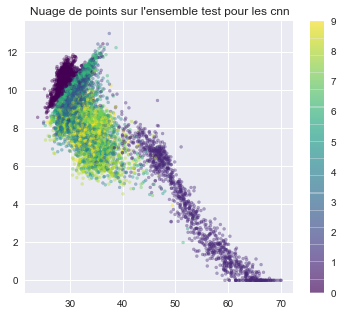

Enfin voici la reconstruction des images en dimension 2 pour les CNN.


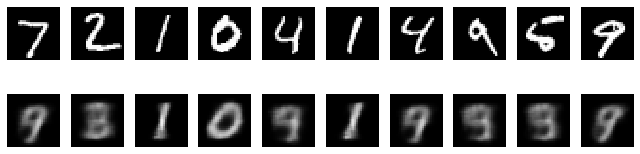

In [0]:
encoder = Model(inputs=autoencoder.input,
                    outputs=autoencoder.get_layer('flatten_10').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_test_cnn, x_test_cnn),
                    verbose=0)


encoded_imgs_test_CNN = encoder.predict(x_test_cnn)
encoded_imgs_train_CNN = encoder.predict(x_train_cnn)
decoded_img_test_m_CNN_2 = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)

MSE_train= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Le MSE calculé sur l'ensemble train pour la dimension 2 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(decoded_img_test_m_CNN_2-x_test_cnn))
print("Le MSE calculé sur l'ensemble test pour la dimension 2 est de ",MSE_test)

print("Nous affichons les deux nuages de points sur respectivement sur les ensembles test et train.")

fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_imgs_train_CNN[:, 0], encoded_imgs_train_CNN[:, 1], c=y_train_initial,alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble train pour les cnn")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_imgs_test_CNN[:, 0], encoded_imgs_test_CNN[:, 1], c=y_test_initial,alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble test pour les cnn")
plt.savefig("m_cnn_2.png")
plt.show()

print("Enfin voici la reconstruction des images en dimension 2 pour les CNN.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img_test_m_CNN_2)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                       vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig("r_m_cnn_2.png")
plt.tight_layout()

<h4> VAE </h4>

Pour finir nous nous intéressons aux "variational autoencoder" (VAE). Nous souhaitons ici encore calculer le MSE associé à cette méthode pour trois valeurs de p différentes (2, 32, 128) et ainsi les comparer aux méthodes précédemment utilisées. Nous afficherons une nouvelle fois la représentation en deux dimensions de nos données obtenue avec cette méthode et nous la comparerons à celles obtenues précédemment.

En premier lieu présentons en quoi consiste les VAE :

Un VAE est un autoencoder auquel on associe notamment un espace latent d'une certaine dimension.
Il convient de plus de choisir une famille paramètriques qui permettra de construire de bons générateurs.

Ainsi dans un premier temps nous génèrons des variables aléatoires avec une certaine densité ensuite nous cherchons à résoudre des problèmes d'optimisation afin de trouver les meilleurs générateurs possibles.

Ensuite nous pouvons observer les résultats des MSE trouvés, ainsi que les représentations des données en 2D et la reconstruction des images qui découlent de cette méthode.

Le MSE calculé sur l'ensemble train pour un p= 2 est de  1376.6623146232603
Le MSE calculé sur l'ensemble test pour un p= 2 est de  569.9545884399282
Voici la représentation des images générées par chaque point de la grille.


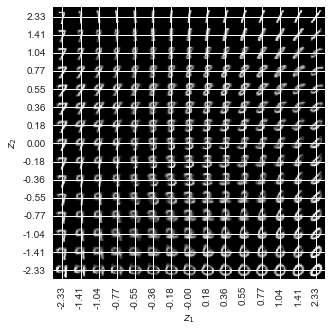

Nous avons ensuite affiché les nuages de points sur les ensembles test et train


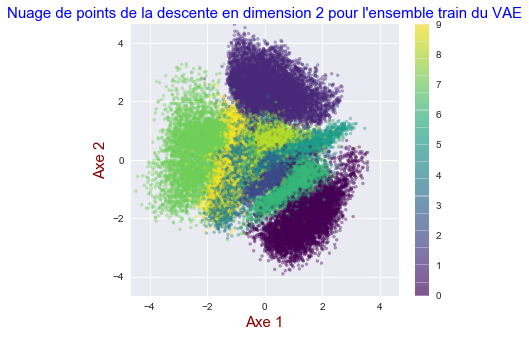

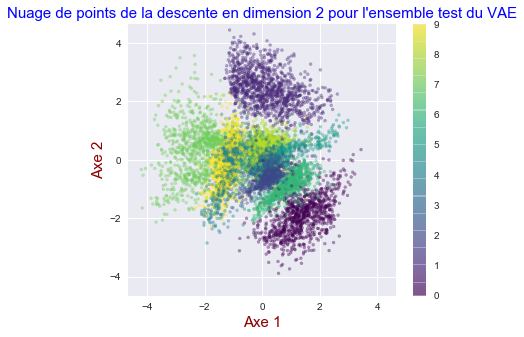

Voici la représentation des images reconstruites pour la méthode des VAE


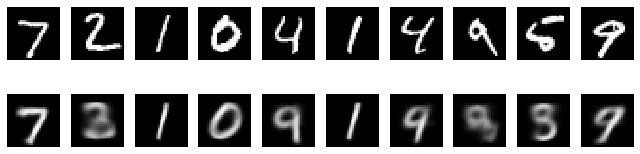

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 2
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)



# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)

# Représentation 2D des sources de variabilités dans les données
# à partir d'une grille de points de taille 15 x 15 dans l'espace latent ici R^2
n = 15  # figure with 15x15 images
quantile_min = 0.01
quantile_max = 0.99

z1 = norm.ppf(np.linspace(quantile_min, quantile_max, n))
z2 = norm.ppf(np.linspace(quantile_max, quantile_min, n))
z_grid = np.dstack(np.meshgrid(z1, z2))



test_encoder = Model(x, z_mu)

z_test = test_encoder.predict(x_test_VAE)
x_pred_test_m_VAE_2 = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)

MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour un p=", p ,"est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(x_pred_test_m_VAE_2-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour un p=", p ,"est de ",MSE_test)


# Génération d'images à partir des points de cette grille
# en utilisant les paramètres appris à l'étape précédente
# par le décodeur
x_pred_grid = decoder.predict(z_grid.reshape(n*n, latent_dim)) \
                     .reshape(n, n, img_rows, img_cols)

print("Voici la représentation des images générées par chaque point de la grille.")
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
ax.set_xticks(np.arange(0, n*img_rows, img_rows) + .5 * img_rows)
ax.set_xticklabels(map('{:.2f}'.format, z1), rotation=90)
ax.set_yticks(np.arange(0, n*img_cols, img_cols) + .5 * img_cols)
ax.set_yticklabels(map('{:.2f}'.format, z2))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
plt.show()


print("Nous avons ensuite affiché les nuages de points sur les ensembles test et train")
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(z_train[:, 0], z_train[:, 1], c=y_train_initial,
                   alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
ax.set_xlim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_ylim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
plt.style.use('seaborn')
plt.title("Nuage de points de la descente en dimension 2 pour l'ensemble train du VAE",fontsize=15,color="blue")
plt.xlabel('Axe 1',fontsize=15,color="darkred")
plt.ylabel('Axe 2',fontsize=15,color="darkred")
plt.show()


fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(z_test[:, 0], z_test[:, 1], c=y_test_initial,
                   alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
ax.set_xlim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_ylim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

plt.style.use('seaborn')
plt.title("Nuage de points de la descente en dimension 2 pour l'ensemble test du VAE",fontsize=15,color="blue")
plt.xlabel('Axe 1',fontsize=15,color="darkred")
plt.ylabel('Axe 2',fontsize=15,color="darkred")
plt.savefig("m_vae_2.png")
plt.show()


print("Voici la représentation des images reconstruites pour la méthode des VAE")
plt.figure(figsize=(9,3))
toPlot = (x_test_VAE, x_pred_test_m_VAE_2)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig("r_m_vae_2.png")
plt.tight_layout()

<h5>Interprétation : </h5>

Nous pouvons voir en dimension 2 que la meilleur valeur de MSE obtenu est pour le VAE suivie par l'autoencoder fully connected. Enfin les moins bons MSE sont obtenus pour l'ACP et le CNN. Cela est valable aussi bien pour le MSE construit sur l'ensemble de test que celui d'entrainement. Cela peut s'avérer assez surprenant sous certains aspects (notamment le CNN qui n'est pas ici parmi les meilleurs méthodes, cependant nous attendrons d'observer les résultats en dimension supérieure avant de tirer des conclusions).

De plus, le VAE et l'autoencoder fully connected sont aussi les deux algorithmes qui reconstruisent le mieux les images avec un léger avantage pour le VAE. Ainsi même en seulement deux dimensions certains chiffres sont dejà discernable pour la VAE (notamment les 1 et les 7).

Finalement, le VAE est l'algorithme qui permet le mieux de représenter la variabilité des classes. Nous pouvons voir que sur le nuage de point généré par le VAE les classes sont bien séparées. 

<h3> Analyse en dimension 32 </h3>

<h4> Approche ACP </h4>

Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble train de : 

In [0]:
p=32
pc2d = np.matmul(PCAdata, axes[:, 0:p])

#calcul MSE sur x_train
tab_X = []
for i in range(0,60000):
    sum=0
    A=x_train[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_X.append(means + sum)
MSE = np.mean(np.linalg.norm(tab_X-x_train))
print(MSE)

901.01984


Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble test de : 

In [0]:
#calcul MSE sur x_test
p=32
tab_MSE_test = []
for i in range(0,10000):
    sum=0
    A=x_test[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_MSE_test.append(means + sum)
    
MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
print(MSE_test)

363.43903


Nous avons également affiché la reconstruction des images. La première ligne correspond aux images originales, la deuxième correspond aux images reconstruites. 

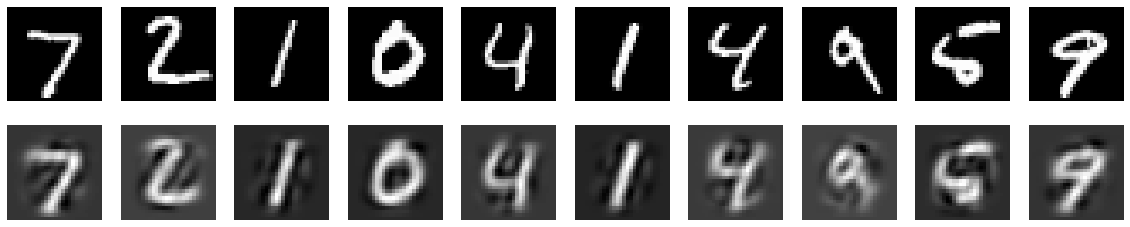

In [0]:
mu = x_test.mean(axis=0)
U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
Zpca = np.dot(x_test - mu, V.transpose())

Rpca = np.dot(Zpca[:,:32], V[:32,:]) + mu    # reconstruction

# use Matplotlib (don't ask)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Rpca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> Autoencoder fully connected </h4>

Le MSE calculé sur l'ensemble train pour un p= 32 est de  619.5116
Le MSE calculé sur l'ensemble test pour un p= 32 est de  252.50151
Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.


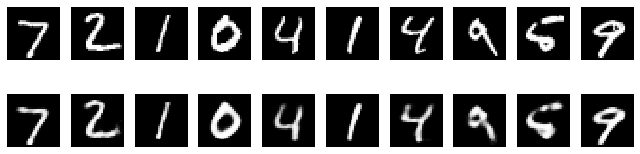

In [0]:
#run la fonction avant de run ce chunk
autoencoder(32,'relu','sigmoid')

<h4> CNN </h4>

In [0]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((4, 4), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))


# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((2, 2, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((4, 4)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_159 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 2, 2, 8)           584       
_________________________________________________________________
flatten_19 (Flatten)         (None, 32)                0         
_________________________________________________________________
reshape_17 (Reshape)         (None, 2, 2, 8)         

Le MSE calculé sur l'ensemble train pour la dimension 32 est de  1063.0928
Le MSE calculé sur l'ensemble test pour la dimension 32 est de  430.49542
Voici enfin la représentation des images reconstruites pour la méthode CNN en dimension 32.


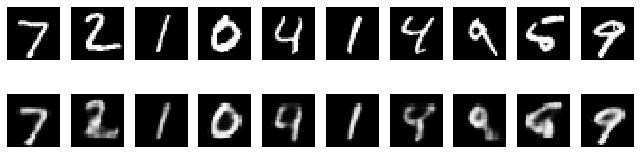

In [0]:
encoder = Model(inputs=autoencoder.input,
                    outputs=autoencoder.get_layer('flatten_19').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_test_cnn, x_test_cnn),
                    verbose=0)


encoded_imgs_test = encoder.predict(x_test_cnn)
decoded_img_test = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)

MSE_train= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Le MSE calculé sur l'ensemble train pour la dimension 32 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(decoded_img_test-x_test_cnn))
print("Le MSE calculé sur l'ensemble test pour la dimension 32 est de ",MSE_test)

print("Voici enfin la représentation des images reconstruites pour la méthode CNN en dimension 32.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                       vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h4> VAE</h4>

Le MSE calculé sur l'ensemble train pour une dimension 32 est de  633.5705270388073
Le MSE calculé sur l'ensemble test pour la dimension 32 est de  260.73503543668
Pour le VAE nous avons une nouvelle fois affiché la reconstruction des images en dimension 32.


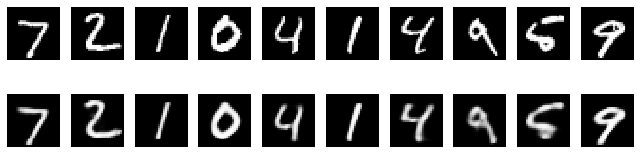

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 32
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)




# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)

test_encoder = Model(x, z_mu)

z_test = test_encoder.predict(x_test_VAE)
x_pred_test = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)


MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour une dimension 32 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(x_pred_test-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour la dimension 32 est de ",MSE_test)


print("Pour le VAE nous avons une nouvelle fois affiché la reconstruction des images en dimension 32.")
plt.figure(figsize=(9,3))
toPlot = (x_test_VAE, x_pred_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()


<h5>Interprétation : </h5>

En dimension 32, nous pouvons tout d'abord observer de manière globale que tous les résultats s'améliorent grandement. 

La hiérarchie des méthodes est pour sa part modifiée. Ainsi, si l'on s'intéresse à la valeur fournit par le MSE, nous observons que les deux meilleurs méthodes sont toujours le VAE et l'autoencoder fully connected mais ces dernières fournissent un résultat désormais équivalent entre elles (le VAE n'est plus meilleur que l'autoencoder fully connected). Pour finir, le CNN est désormais la moins bonne méthode concernant la valeur de MSE. Il peut y avoir plusieurs explications à tout cela :

- nous avons choisi une combinaison de fonctions d'activations qui est parmi les meilleures possibles pour l'autoencoder fully-connected

- il est très difficile de construire un bon CNN car il nécessite plus de temps de calcul que les autres méthodes pour aboutir à de bons résultats et avec le temps que nous avions il était difficile de faire tourner l'algorithme beaucoup plus longtemps 

Si l'on s'intéresse à la reconstruction d'images, c'est toujours le VAE et l'autoencoder fully connected qui sont les plus efficaces. Les images reconstruites par ces méthodes sont exploitable et lisible. Quelques points flous existent encore. L'ACP et le CNN reconstruise bien moins bien les images mais ne commettent pas tout les deux les mêmes erreurs. L'ACP a beaucoup de mal avec les niveaux de gris (l'arrière plan est bien moins sombre que sur les images originales et le tout est très flou). Le CNN produit lui simplement des chiffres qui ne sont pas très net. Nous allons étudier si tout cela s'améliore en dimension 128.

<h3> Analyse en dimension 128 </h3>

<h4> Approche ACP </h4>

Nous avons calculé le MSE sur l'ensemble train pour l'approche ACP et nous obtenons le résultat suivant : 

In [0]:
p=128
pc2d = np.matmul(PCAdata, axes[:, 0:p])

#calcul MSE sur x_train
tab_X = []
for i in range(0,60000):
    sum=0
    A=x_train[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_X.append(means + sum)
MSE = np.mean(np.linalg.norm(tab_X-x_train))
print(MSE)

866.4558


Nous avons calculé le MSE sur l'ensemble test pour l'approche ACP et nous obtenons le résultat suivant : 

In [0]:
#calcul MSE sur x_test
p=128
tab_MSE_test = []
for i in range(0,10000):
    sum=0
    A=x_test[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_MSE_test.append(means + sum)
    
MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
print(MSE_test)

350.6586


En dimension 128, pour l'ACP nous obtenons la reconstruction d'images suivante : 

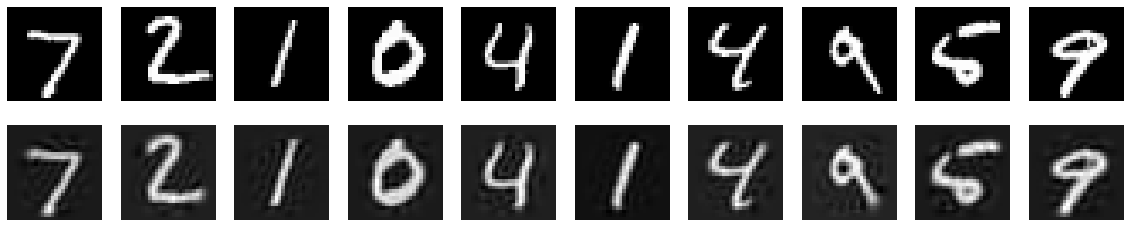

In [0]:
mu = x_test.mean(axis=0)
U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
Zpca = np.dot(x_test - mu, V.transpose())

Rpca = np.dot(Zpca[:,:128], V[:128,:]) + mu    # reconstruction

# use Matplotlib (don't ask)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Rpca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> FULLY CONNECTED</h4>

Le MSE calculé sur l'ensemble train pour un p= 128 est de  324.08414
Le MSE calculé sur l'ensemble test pour un p= 128 est de  136.99217
Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.


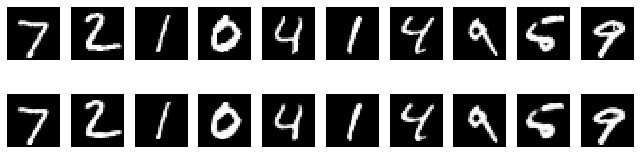

In [0]:
autoencoder(128,'relu','sigmoid')

<h4> CNN </h4>

In [0]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_21 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_19 (Reshape)         (None, 4, 4, 8)         

Le MSE calculé sur l'ensemble train pour la dimension 128 est de  544.9013
Le MSE calculé sur l'ensemble test pour la dimension 128 est de  219.61696
Enfin, pour la dimension 128 nous avons affiché la reconstruction des images pour la méthode CNN.


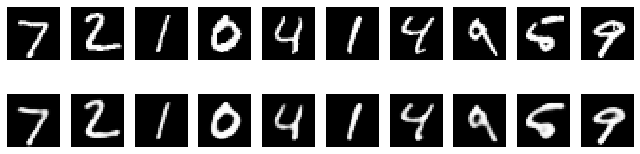

In [0]:
encoder = Model(inputs=autoencoder.input,
                    outputs=autoencoder.get_layer('flatten_21').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_test_cnn, x_test_cnn),
                    verbose=0)


encoded_imgs = encoder.predict(x_test_cnn)
decoded_img_test = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)

MSE_train= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Le MSE calculé sur l'ensemble train pour la dimension 128 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(decoded_img_test-x_test_cnn))
print("Le MSE calculé sur l'ensemble test pour la dimension 128 est de ",MSE_test)


print("Enfin, pour la dimension 128 nous avons affiché la reconstruction des images pour la méthode CNN.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                       vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()



 <h4> VAE </h4>

Le MSE calculé sur l'ensemble train pour la dimension 128 est de  634.0932110479838
Le MSE calculé sur l'ensemble test pour la dimension 128 est de  260.8778384617933
Nous terminons cette analyse de la base de données MNIST sur la recontruction des images par la méthode VAE et nous obtenons :


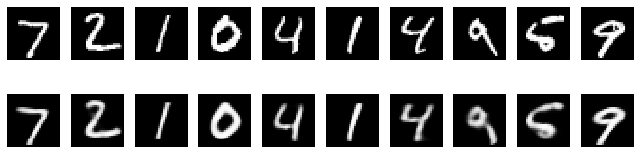

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 128
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)



# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)


test_encoder = Model(x, z_mu)
z_test = test_encoder.predict(x_test_VAE)
x_pred_test = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)


MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour la dimension 128 est de ",MSE_train)
MSE_test= np.mean(np.linalg.norm(x_pred_test-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour la dimension 128 est de ",MSE_test)

print("Nous terminons cette analyse de la base de données MNIST sur la recontruction des images par la méthode VAE et nous obtenons :")
plt.figure(figsize=(9,3))
toPlot = (x_test_VAE, x_pred_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()


<h5>Interprétation : </h5>

La dimension 128 est extremement intéressante. Nous pouvons cette fois-ci observer que la valeur du MSE obtenue continue de s'améliorer grandement pour la méthode des autoencoder fully connected ainsi que pour le CNN. Cependant la valeur de MSE pour l'ACP et le VAE n'ont que très peu varié par rapport à la dimension 32.

La hiérarchie des méthodes pour le MSE est la suivante: L'autoencoder fully connected avec de bonnes fonctions d'activations fournit les meilleurs résultats suivit par le CNN, par le VAE et enfin par l'ACP.

Si l'on s'intéresse à la reconstruction des images, nous pouvons observer que l'autoencoder fully connected est aussi la méthode qui permet d'obtenir les meilleurs résultats. Les images sont très fidèlement reconstruite. Le CNN vient ensuite avec une reconstruction très bonne mais qui ne porte pas autant de détails. Le VAE reconstruit les images légrèment moins bien que les méthodes précédentes, notamment à cause d'un légèr flou. Enfin l'ACP reconstruit toujours des images un peu flou avec un fond qui n'est pas aussi sombre que les images originales.

<h2> Jeu de donnée n$^{\circ}$3 : Fashion MNIST  </h2>

Enfin nous nous sommes intéressés à une nouvelle base de données qui est sur de nombreux aspects similaires à la base de données MNIST. 
Celle-ci s'appelle Fashion MNIST et est composée de 60 000 images d'articles de modes en basse résolution servant à l’apprentissage de l’algorithme et 10 000 supplémentaires pour tester les résultats. Ces données sont donc sous la forme d’images de $28*28$ pixels, ce qui donne des données en 784 dimensions. Cette base est très intéressante car elle est destinée à terme à eventuellement remplacer la base de données MNIST car cette dernière n'est plus assez complexe pour les dernières avancées en machine learning (cependant dans le cadre de notre projet MNIST reste suffisament intéressante car nous n'appliquons pas les algorithmes les plus avancés). 


Ainsi étant donné que la structuration des images est identitique à celle de la base MNIST nous pourrons facilement calculer les mêmes résultats que précédemment pour cette base de données. Ainsi nous calculerons encore les MSE associés aux différentes méthodes et nous afficherons les représentations 2D de nos données avant de présenter la reconstruction des images. Nous effectuerons encore une fois tout cela pour différentes dimensions de descentes p=2, 32 et 128.

In [0]:
(x_train_initial, y_train_initial), (x_test_initial, y_test_initial) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train_initial.astype('float32') / 255.
x_test = x_test_initial.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

<h3> Analyse en dimension 2 </h3>

<h4> Approche ACP </h4>

La valeur du MSE calculée sur l'ensemble train pour la dimension  2  est la suivante :  1511.365
La valeur du MSE calculée sur l'ensemble test pour la dimension  2  est la suivante :  615.8587
Nous affichons ensuite le nuage de points associé à l'ACP


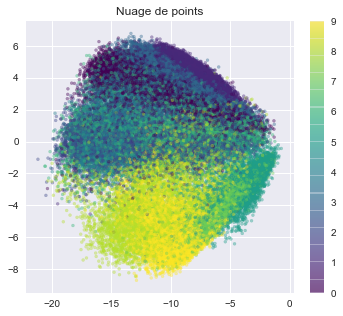

Nous avons ensuite affiché la reconstruction des images, la première ligne correspond aux images originales tandis que la deuxième correspond aux images reconstruites.


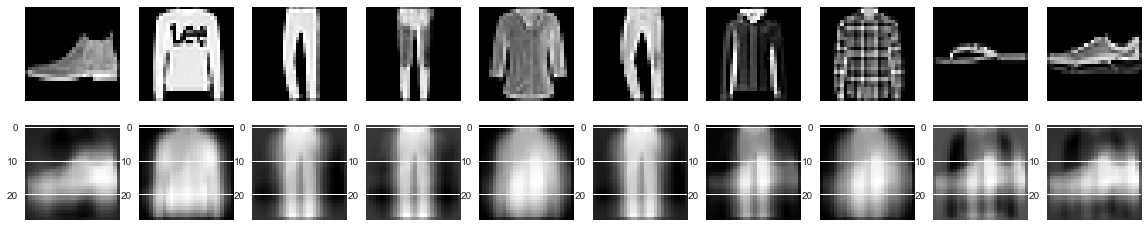

In [0]:
#approche ACP 
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

PCAdata = x_train 

cov = np.matmul(PCAdata.transpose(), PCAdata) / (PCAdata.shape[0] - 1)
eig, axes = np.linalg.eig(cov)


pc2d = np.matmul(PCAdata, axes[:, 0:2])
pc1 = np.array(pc2d[:, 0].transpose())
pc2 = np.array(pc2d[:, 1].transpose())



#calcul MSE sur x_train
tab_X = []
p=2
for i in range(0,60000):
    sum=0
    A=x_train[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_X.append(means + sum)

MSE = np.mean(np.linalg.norm(tab_X-x_train))
print("La valeur du MSE calculée sur l'ensemble train pour la dimension ",p," est la suivante : ", MSE)

#calcul MSE sur x_test
tab_MSE_test = []
p=2
for i in range(0,10000):
    sum=0
    A=x_test[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_MSE_test.append(means + sum)
    
MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
print("La valeur du MSE calculée sur l'ensemble test pour la dimension ",p," est la suivante : ", MSE_test)


print("Nous affichons ensuite le nuage de points associé à l'ACP")
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(pc1, pc2, c=y_train_initial, alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points")
plt.show()



print("Nous avons ensuite affiché la reconstruction des images, la première ligne correspond aux images originales tandis que la deuxième correspond aux images reconstruites.")

mu = x_test.mean(axis=0)
U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
Zpca = np.dot(x_test - mu, V.transpose())

Rpca = np.dot(Zpca[:,:2], V[:2,:]) + mu    # reconstruction

# use Matplotlib (don't ask)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Rpca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
plt.show()

<h4> Autoencoder fully connected </h4>

Le MSE calculé sur l'ensemble train pour un p= 2 est de  2023.0953
Le MSE calculé sur l'ensemble test pour un p= 2 est de  824.1719


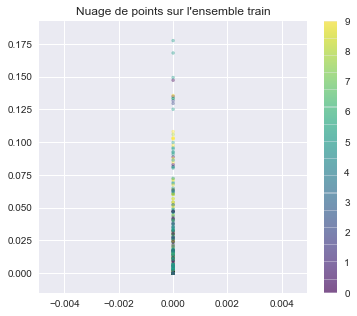

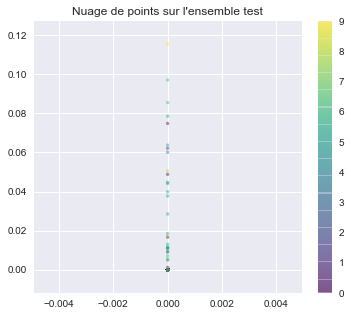

In [0]:
autoencoder = Sequential()
input_dim = 784
encoding_dim= 2

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))



input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))



autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=0)

encoded_imgs_test_FC = encoder.predict(x_test)
encoded_imgs_train_FC = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs_train = autoencoder.predict(x_train)

MSE_train_FC= np.mean(np.linalg.norm(decoded_imgs_train-x_train))
print("Le MSE calculé sur l'ensemble train pour un p=", p ,"est de ",MSE_train_FC)

MSE_test_FC= np.mean(np.linalg.norm(decoded_imgs-x_test))
print("Le MSE calculé sur l'ensemble test pour un p=", p ,"est de ",MSE_test_FC)


fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_imgs_train_FC[:, 0], encoded_imgs_train_FC[:, 1], c=y_train_initial, alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble train")
plt.show()
        
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_imgs_test_FC[:, 0], encoded_imgs_test_FC[:, 1], c=y_test_initial, alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble test")
plt.show()

Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.


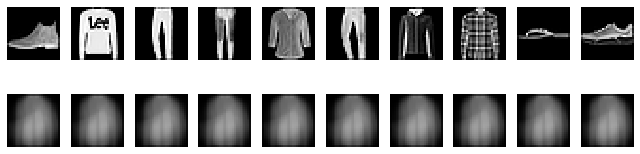

In [0]:
print("Ensuite nous avons affiché la reconstruction des images, la première ligne représente les images originales tandis que la deuxième représente les images recontruites.")
plt.figure(figsize=(9,3))
toPlot = (x_test, decoded_imgs)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h4> CNN </h4>

In [0]:
x_train_cnn = x_train.reshape((len(x_train), 28, 28, 1))
x_test_cnn = x_test.reshape((len(x_test), 28, 28, 1))

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(2, (3, 3), strides=(2,2), activation='relu', padding='same'))


# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((1, 1, 2)))

# Decoder Layers
autoencoder.add(Conv2D(2, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_180 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 4, 4, 8)         

Le MSE calculé sur l'ensemble train pour la dimension 2 est de  2421.8528
Le MSE calculé sur l'ensemble test pour la dimension 2 est de  986.84064


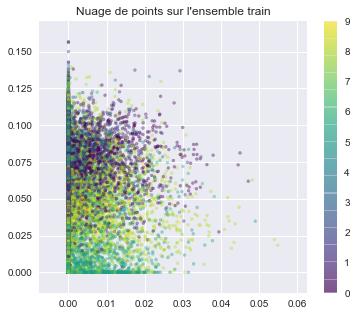

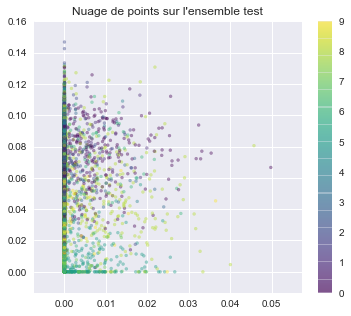

Enfin voici la reconstruction des images en dimension 2 pour les CNN.


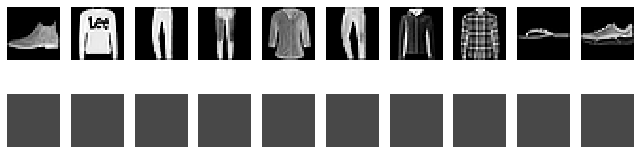

In [0]:

encoder = Model(inputs=autoencoder.input,
                outputs=autoencoder.get_layer('flatten_22').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                epochs=25,
                batch_size=128,
                validation_data=(x_test_cnn, x_test_cnn),
                verbose=0)

encoded_img = encoder.predict(x_test_cnn)
encoded_img_train = encoder.predict(x_train_cnn)
decoded_img = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)

MSE_train_CNN= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Le MSE calculé sur l'ensemble train pour la dimension 2 est de ",MSE_train_CNN)

MSE_test_CNN= np.mean(np.linalg.norm(decoded_img-x_test_cnn))
print("Le MSE calculé sur l'ensemble test pour la dimension 2 est de ",MSE_test_CNN)


fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_img_train[:, 0], encoded_img_train[:, 1], c=y_train_initial,alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble train")
plt.show()


fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(encoded_img[:, 0], encoded_img[:, 1], c=y_test_initial,alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
plt.title("Nuage de points sur l'ensemble test")
plt.show()

print("Enfin voici la reconstruction des images en dimension 2 pour les CNN.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h4> VAE </h4>

Le MSE calculé sur l'ensemble train pour la dimension 2 est de  1154.9859028246742
Le MSE calculé sur l'ensemble test pour la dimension 2 est de  473.117340794732
Voici la représentation des images générées par chaque point de la grille.


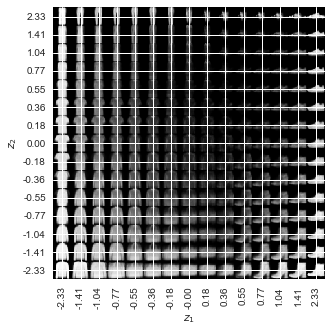

Nous avons ensuite affiché les nuages de points sur les ensembles test et train


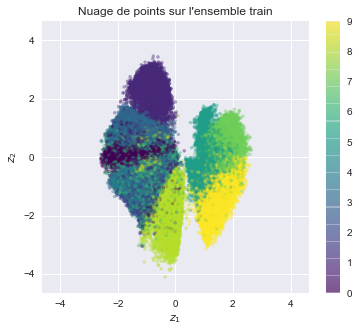

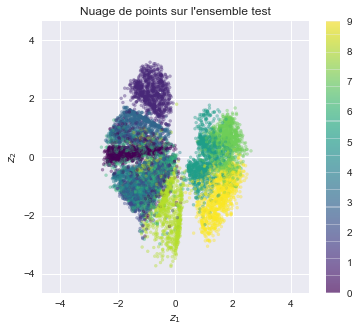

Voici la représentation des images reconstruites pour la méthode des VAE


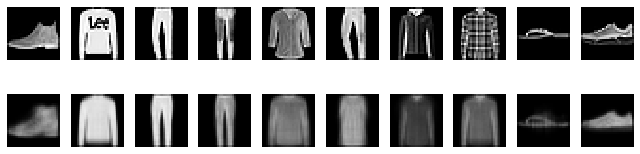

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 2
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)




# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)

# Représentation 2D des sources de variabilités dans les données
# à partir d'une grille de points de taille 15 x 15 dans l'espace latent ici R^2
n = 15  # figure with 15x15 images
quantile_min = 0.01
quantile_max = 0.99

z1 = norm.ppf(np.linspace(quantile_min, quantile_max, n))
z2 = norm.ppf(np.linspace(quantile_max, quantile_min, n))
z_grid = np.dstack(np.meshgrid(z1, z2))

# Génération d'images à partir des points de cette grille
# en utilisant les paramètres appris à l'étape précédente
# par le décodeur
test_encoder = Model(x, z_mu)
z_test = test_encoder.predict(x_test_VAE)
x_pred_test = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)

MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour la dimension 2 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(x_pred_test-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour la dimension 2 est de ",MSE_test)


# Génération d'images à partir des points de cette grille
# en utilisant les paramètres appris à l'étape précédente
# par le décodeur
x_pred_grid = decoder.predict(z_grid.reshape(n*n, latent_dim)) \
                     .reshape(n, n, img_rows, img_cols)
print("Voici la représentation des images générées par chaque point de la grille.")

# Représentation des images générées par chaque point de la grille
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
ax.set_xticks(np.arange(0, n*img_rows, img_rows) + .5 * img_rows)
ax.set_xticklabels(map('{:.2f}'.format, z1), rotation=90)
ax.set_yticks(np.arange(0, n*img_cols, img_cols) + .5 * img_cols)
ax.set_yticklabels(map('{:.2f}'.format, z2))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
plt.show()


# Visualisation de l'encodage des images sur l'ensemble test
# en fonction de leur classe d'apparteance (représentée par un code couleur entre 0 et 9)

print("Nous avons ensuite affiché les nuages de points sur les ensembles test et train")
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(z_train[:, 0], z_train[:, 1], c=y_train_initial,
                   alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
ax.set_xlim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_ylim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
plt.title("Nuage de points sur l'ensemble train")
plt.show()

z_test = test_encoder.predict(x_test, batch_size=batch_size)
fig, ax = plt.subplots(figsize=(6, 5))
cbar = ax.scatter(z_test[:, 0], z_test[:, 1], c=y_test_initial,
                   alpha=.4, s=3**2, cmap='viridis')
fig.colorbar(cbar, ax=ax)
ax.set_xlim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_ylim(2.*norm.ppf((quantile_min, quantile_max)))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
plt.title("Nuage de points sur l'ensemble test")
plt.show()


print("Voici la représentation des images reconstruites pour la méthode des VAE")
plt.figure(figsize=(9,3))
toPlot = (x_test, x_pred_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h5>Interprétation : </h5>

Pour la base de données Fashion MNIST en dimension 2 nous pouvons observer que la meilleur valeur de MSE obtenu est encore pour le VAE suivie cette fois-ci par l'ACP. Enfin les moins bons MSE sont obtenus pour l'autoencoder fully connected et le CNN. Encore une fois ces observations sont valable aussi bien pour le MSE construit sur l'ensemble de test que celui d'entrainement. Encore une fois on peut se montrer surpris du fait que le CNN soit ici une méthode donnant de moins bons résultats que les autres et il conviendra d'étudier cela dans les autres dimensions.

De plus, le VAE et l'ACP sont aussi les deux algorithmes qui reconstruisent le mieux les images avec tout de même un avantage pour le VAE. Ainsi en dimension 2, le VAE reconstruit correctement les formes des vêtements bien qu'ils soient flou. L'ACP s'en approche aussi, bien que les formes soient encore plus flou. L'autoencoder fully connected reconstruit pour sa part des images qui sont toujours extrêment proche, ce qui montre qu'il n'a pas reussit à apprendre ce qui caractérise chaque classe de vêtements. Enfin le CNN ne reconstruit presque rien du tout.

Finalement, le VAE est, comme pour la base MNIST, l'algorithme qui permet le mieux de représenter la variabilité des classes. Nous pouvons voir que sur le nuage de point généré par le VAE les classes sont les mieux séparées. L'ACP n'est pas en reste et produit une bonne séparation aussi. 

<h3> Analyse en dimension 32 </h3>

<h4> Approche ACP </h4>

Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble train de :  843.96844
Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble test de :  344.70862
Nous avons également affiché la reconstruction des images. La première ligne correspond aux images originales, la deuxième correspond aux images reconstruites. 


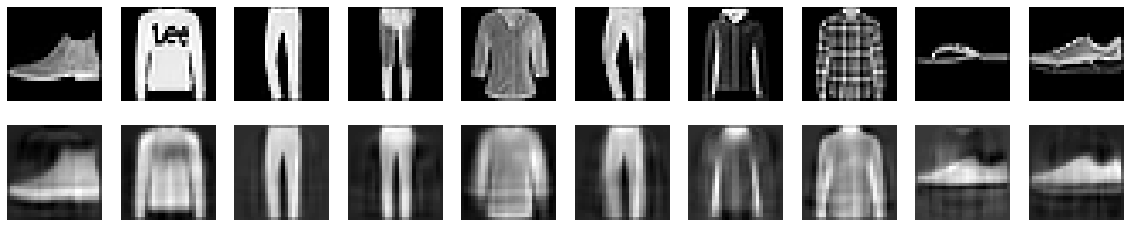

In [0]:
    p=32
    means = np.mean(x_train, axis=0)
    stds = np.std(x_train, axis=0)

    PCAdata = x_train 

    cov = np.matmul(PCAdata.transpose(), PCAdata) / (PCAdata.shape[0] - 1)
    eig, axes = np.linalg.eig(cov)
    pc2d = np.matmul(PCAdata, axes[:, 0:p])


    #calcul MSE sur x_train
    tab_X = []
    for i in range(0,60000):
        sum=0
        A=x_train[i,:]-means
        for j in range(0, p):
            pdt = np.vdot(A,axes[:,j])
            fin = pdt*axes[:,j]
            sum = sum + fin 
        tab_X.append(means + sum)
        
    MSE = np.mean(np.linalg.norm(tab_X-x_train))
    print("Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble train de : ",MSE)
    
    #calcul MSE sur x_test
    tab_MSE_test = []
    for i in range(0,10000):
        sum=0
        A=x_test[i,:]-means
        for j in range(0, p):
            pdt = np.vdot(A,axes[:,j])
            fin = pdt*axes[:,j]
            sum = sum + fin 
        tab_MSE_test.append(means + sum)

    MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
    print("Pour la méthode de l'ACP en dimension 32 trouvons un MSE sur l'ensemble test de : ",MSE_test)
    
    mu = x_test.mean(axis=0)
    U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
    Zpca = np.dot(x_test - mu, V.transpose())

    Rpca = np.dot(Zpca[:,:32], V[:32,:]) + mu    # reconstruction
    
    print("Nous avons également affiché la reconstruction des images. La première ligne correspond aux images originales, la deuxième correspond aux images reconstruites. ")
    # use Matplotlib (don't ask)
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(Rpca[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

<h4> Autoencoder fully-connected </h4>

Pour la méthode de l'autoencoder fully-connected en dimension 32 trouvons un MSE sur l'ensemble train de :  696.043
Pour la méthode de l'autoencoder fully-connected en dimension 32 trouvons un MSE sur l'ensemble test de :  287.14774
Nous avons également affiché la reconstruction des images. La première ligne correspond aux images originales, la deuxième correspond aux images reconstruites. 


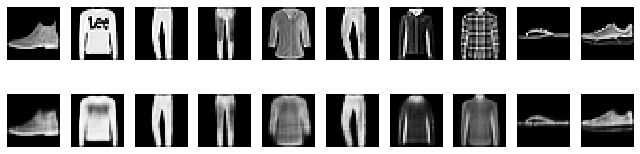

In [0]:
autoencoder = Sequential()
input_dim = 784
encoding_dim= 32

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))



input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))



autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=0)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs_train = autoencoder.predict(x_train)

MSE_1= np.mean(np.linalg.norm(decoded_imgs_train-x_train))
print("Pour la méthode de l'autoencoder fully-connected en dimension 32 trouvons un MSE sur l'ensemble train de : ",MSE_1)

MSE_2= np.mean(np.linalg.norm(decoded_imgs-x_test))
print("Pour la méthode de l'autoencoder fully-connected en dimension 32 trouvons un MSE sur l'ensemble test de : ",MSE_2)


print("Nous avons également affiché la reconstruction des images. La première ligne correspond aux images originales, la deuxième correspond aux images reconstruites. ")
plt.figure(figsize=(9,3))
toPlot = (x_test, decoded_imgs)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h4> CNN </h4>

In [0]:
x_train_cnn = x_train.reshape((len(x_train), 28, 28, 1))
x_test_cnn = x_test.reshape((len(x_test), 28, 28, 1))

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((4, 4), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))


# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((2, 2, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((4, 4)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 2, 2, 8)           584       
_________________________________________________________________
flatten_23 (Flatten)         (None, 32)                0         
_________________________________________________________________
reshape_21 (Reshape)         (None, 2, 2, 8)         

Le MSE calculé sur l'ensemble train pour la dimension 32 est de  971.3917
Le MSE calculé sur l'ensemble test pour a dimension 32 est de  397.54773
Voici enfin la représentation des images reconstruites pour la méthode CNN en dimension 32.


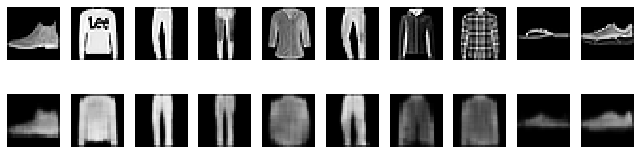

In [0]:
encoder = Model(inputs=autoencoder.input,
                outputs=autoencoder.get_layer('flatten_23').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                epochs=25,
                batch_size=256,
                validation_data=(x_test_cnn, x_test_cnn),
                verbose=0)

encoded_imgs = encoder.predict(x_test_cnn)
decoded_img = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)

MSE_train= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Le MSE calculé sur l'ensemble train pour la dimension 32 est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(decoded_img-x_test_cnn))
print("Le MSE calculé sur l'ensemble test pour a dimension 32 est de ",MSE_test)

print("Voici enfin la représentation des images reconstruites pour la méthode CNN en dimension 32.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h4> VAE </h4>

Le MSE calculé sur l'ensemble train pour un p= 32 est de  778.0130457075054
Le MSE calculé sur l'ensemble test pour un p= 32 est de  321.1352548835732
Pour le VAE nous avons une nouvelle fois affiché la reconstruction des images en dimension 128.


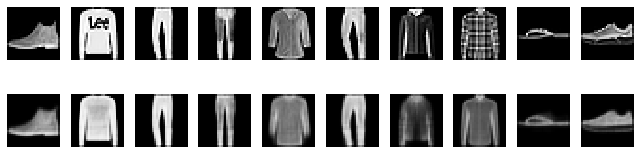

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 32
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)



# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)

test_encoder = Model(x, z_mu)

z_test = test_encoder.predict(x_test_VAE)
x_pred_test = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)


MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour un p=", p ,"est de ",MSE_train)

MSE_test= np.mean(np.linalg.norm(x_pred_test-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour un p=", p ,"est de ",MSE_test)

print("Pour le VAE nous avons une nouvelle fois affiché la reconstruction des images en dimension 128.")
plt.figure(figsize=(9,3))
toPlot = (x_test_VAE, x_pred_test)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

<h5>Interprétation : </h5>

En dimension 32, tout comme pour la base MNIST nous observons globalement que tous les résultats se sont améliorés. 

Si l'on s'intéresse à la valeur du MSE, on observe que la meilleure méthode est l'autoencoder fully connected qui s'améliore donc grandement par rapport à la dimension 2, suivit cette fois-ci par le VAE. Ensuite on observe que c'est l'ACP qui produit de meilleurs résultats que le CNN, qui produit donc le moins bon résultat. Les explications pourrait être les mêmes que pour la base de données MNIST concernat cette observation à savoir notamment que le CNN est très difficile à calibrer.


Si l'on s'intéresse à la reconstruction d'images, c'est ecnore l'autoencoder fully connected qui est le plus efficace (on commence a distinguer des imprimés sur les vêtements bien que flou). Ensuite le VAE fournit des résultats assez satisfaisants. L'ACP et le CNN reconstruise encore une fois bien moins bien les images mais font des erreurs de reconstruction différentes. L'ACP a encore une fois beaucoup de mal avec l'arrière plan et les images ne sont pas nettes. Le CNN produit lui bien les formes mais les vêtements sont très flou.

<h3> Analyse en dimension 128 </h3>

<h4>Approche ACP</h4>

Nous avons calculé le MSE sur l'ensemble train pour l'approche ACP et nous obtenons le résultat suivant :  543.0174
Nous avons calculé le MSE sur l'ensemble train pour l'approche ACP et nous obtenons le résultat suivant :  222.47545
En dimension 128, pour l'ACP nous obtenons la reconstruction d'images suivante : 


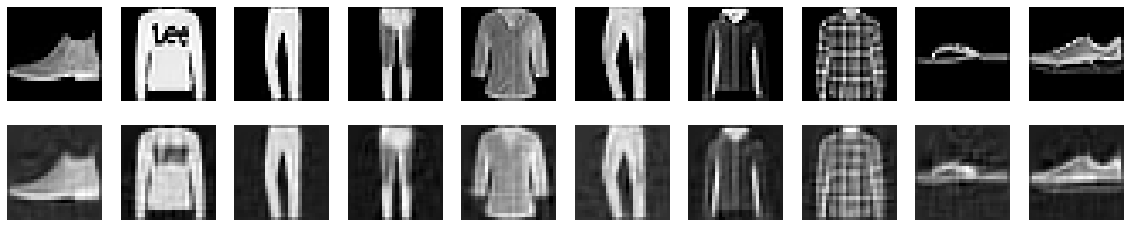

In [0]:
#approche ACP
p=128
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

PCAdata = x_train 

cov = np.matmul(PCAdata.transpose(), PCAdata) / (PCAdata.shape[0] - 1)
eig, axes = np.linalg.eig(cov)


pc2d = np.matmul(PCAdata, axes[:, 0:128])

#calcul MSE sur x_train
tab_X = []
for i in range(0,60000):
    sum=0
    A=x_train[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_X.append(means + sum)

MSE = np.mean(np.linalg.norm(tab_X-x_train))
print("Nous avons calculé le MSE sur l'ensemble train pour l'approche ACP et nous obtenons le résultat suivant : ",MSE)

#calcul MSE sur x_test
tab_MSE_test = []
p=128
for i in range(0,10000):
    sum=0
    A=x_test[i,:]-means
    for j in range(0, p):
        pdt = np.vdot(A,axes[:,j])
        fin = pdt*axes[:,j]
        sum = sum + fin 
    tab_MSE_test.append(means + sum)
    
MSE_test = np.mean(np.linalg.norm(tab_MSE_test-x_test))
print("Nous avons calculé le MSE sur l'ensemble train pour l'approche ACP et nous obtenons le résultat suivant : ",MSE_test)

mu = x_test.mean(axis=0)
U,s,V = np.linalg.svd(x_test - mu, full_matrices=False)
Zpca = np.dot(x_test - mu, V.transpose())

Rpca_f_128 = np.dot(Zpca[:,:128], V[:128,:]) + mu    # reconstruction

print("En dimension 128, pour l'ACP nous obtenons la reconstruction d'images suivante : ")
# use Matplotlib (don't ask)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Rpca_f_128[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("r_f_acp_128.png")
plt.show()

<h4>AutoEncoder</h4>

Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble train de :  577.60803
Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble test de :  240.58887
En dimension 128, pour l'autoencoder fully-connected nous obtenons la reconstruction d'images suivante : 


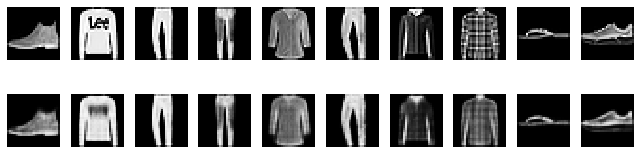

In [0]:
autoencoder = Sequential()
input_dim = 784
encoding_dim= 128

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))



input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))



autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=0)

encoded_imgs = encoder.predict(x_test)
decoded_imgs_f_128_FC = autoencoder.predict(x_test)
decoded_imgs_train = autoencoder.predict(x_train)


MSE_train= np.mean(np.linalg.norm(decoded_imgs_train-x_train))
print("Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble train de : ",MSE_train)


MSE_test= np.mean(np.linalg.norm(decoded_imgs_f_128_FC-x_test))
print("Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble test de : ",MSE_test)

print("En dimension 128, pour l'autoencoder fully-connected nous obtenons la reconstruction d'images suivante : ")
plt.figure(figsize=(9,3))
toPlot = (x_test, decoded_imgs_f_128_FC)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig("r_f_fc_128.png")
plt.tight_layout()

<h4> CNN </h4>

In [0]:
x_train_cnn = x_train.reshape((len(x_train), 28, 28, 1))
x_test_cnn = x_test.reshape((len(x_test), 28, 28, 1))

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_cnn.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 4, 4, 8)         

Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble train de :  776.02747
Pour la méthode de l'autoencoder CNN en dimension 128 trouvons un MSE sur l'ensemble train de :  317.778
Enfin, pour la dimension 128 nous avons affiché la reconstruction des images pour la méthode CNN.


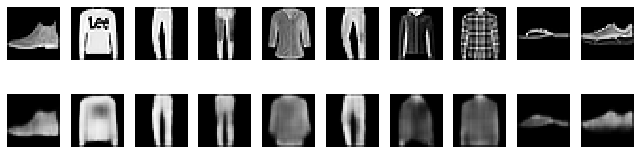

In [0]:
encoder = Model(inputs=autoencoder.input,
                outputs=autoencoder.get_layer('flatten_12').output)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_cnn, x_train_cnn,
                epochs=25,
                batch_size=256,
                validation_data=(x_test_cnn, x_test_cnn),
                verbose=0)

encoded_img = encoder.predict(x_test_cnn)
decoded_img_f_128_CNN = autoencoder.predict(x_test_cnn)
decoded_img_train = autoencoder.predict(x_train_cnn)


MSE_train= np.mean(np.linalg.norm(decoded_img_train-x_train_cnn))
print("Pour la méthode de l'autoencoder fully-connected en dimension 128 trouvons un MSE sur l'ensemble train de : ",MSE_train)


MSE_test= np.mean(np.linalg.norm(decoded_img_f_128_CNN-x_test_cnn))
print("Pour la méthode de l'autoencoder CNN en dimension 128 trouvons un MSE sur l'ensemble train de : ",MSE_test)


print("Enfin, pour la dimension 128 nous avons affiché la reconstruction des images pour la méthode CNN.")
plt.figure(figsize=(9,3))
toPlot = (x_test_cnn, decoded_img_f_128_CNN)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig("r_f_cnn_128.png")
plt.tight_layout()

<h4> VAE </h4>

Le MSE calculé sur l'ensemble train pour un p= 128 est de  796.3091020448114
Le MSE calculé sur l'ensemble test pour un p= 128 est de  328.31674594565493
Nous terminons cette analyse de la base de données MNIST sur la recontruction des images par la méthode VAE et nous obtenons :


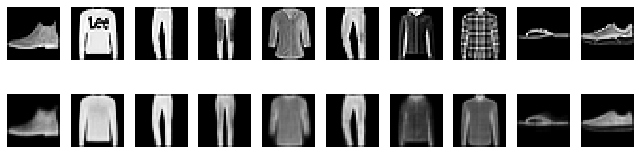

In [0]:
img_rows, img_cols = x_train_initial.shape[1:]

# Definition de quelques constantes
original_dim = img_rows * img_cols
intermediate_dim = 256
latent_dim = 128
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Spécification du modèle

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs

        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs
    
# La fonction de perte ci-dessous est liée au modèle Bernoulli multivarié
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# Encodeur et decodeur
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

eps = Input(tensor=K.random_normal(shape=(K.shape(x)[0], 
                                          latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred, name='vae')
vae.compile(optimizer='rmsprop', loss=nll)




# Normalisation des valeurs des pixels des images entre 0 et 1
x_train_VAE = x_train_initial.reshape(-1, original_dim) / 255.
x_test_VAE = x_test_initial.reshape(-1, original_dim) / 255.

# Optimisation des paramètres du modèle
hist = vae.fit(
    x_train_VAE,
    x_train_VAE,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_VAE, x_test_VAE),
    verbose=0
)

test_encoder = Model(x, z_mu)

z_test = test_encoder.predict(x_test_VAE)
x_pred_test_f_VAE_128 = decoder.predict(z_test)

z_train = test_encoder.predict(x_train_VAE)
x_pred_train = decoder.predict(z_train)


MSE_train = np.mean(np.linalg.norm(x_pred_train-x_train_VAE))
print("Le MSE calculé sur l'ensemble train pour un p=", p ,"est de ",MSE_train)
MSE_test= np.mean(np.linalg.norm(x_pred_test_f_VAE_128-x_test_VAE))
print("Le MSE calculé sur l'ensemble test pour un p=", p ,"est de ",MSE_test)

print("Nous terminons cette analyse de la base de données MNIST sur la recontruction des images par la méthode VAE et nous obtenons :")
plt.figure(figsize=(9,3))
toPlot = (x_test_VAE, x_pred_test_f_VAE_128)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig("r_f_vae_128.png")
plt.tight_layout()

<h5>Interprétation : </h5>

Encore une fois, il y a des observations très intéressante à faire. Nous pouvons observer (comme pour MNIST) que la valeur du MSE obtenue continue de s'améliorer pour la méthode des autoencoder fully connected ainsi que pour le CNN. Cepandant cette fois-ci la valeur de l'ACP s'améliore elle aussi assez nettement. Seule la valeur du MSE pour le VAE n'a que très peu varié par rapport à la dimension 32.

La hiérarchie des méthodes pour le MSE est la suivante: l'ACP fournit les meilleurs résultats. L'autoencoder fully connected avec de bonnes fonctions d'activations fournit aussi de bons résultats puis enfin le CNN et le VAE sont presque à égalités avec un léger avantage pour le CNN.

Si l'on s'intéresse à la reconstruction des images, l'ACP permet de reconstruire les meilleurs images (avec le plus de détails). Nous pouvons, de plus observer que l'autoencoder fully connected est aussi une méthode qui permet d'obtenir de bons résultats. Les images sont assez fidèlement reconstruite. Le CNN vient ensuite avec une reconstruction qui est bien moins nette sur les vêtements. Le VAE reconstruit les images légrèment moins bien que les méthodes précédentes.

<h1 id="conclusion"> Conclusion </h1>

Nous avons donc étudié de nombreuses méthodes pour différentes valeurs de descente en dimension et obtenu des résultats très intéressants. 

Un petit récapitulatif s'impose, cependant disposant d'une centaine de résultats et afin de ne pas saturer cette partie nous avons effectué une selection des résultats que nous présenterons. 
Nous présenterons ainsi les résultats obtenus pour la base de données MNIST pour la dimension de descente p=2 ainsi que ceux obtenus pour la base de données fashion MNIST pour la dimension de descente p=128.

Des conclusions propre à chacune des dimensions étudiées ont été faite dans le rapport. Les dimensions influent grandement sur les résultats obtenus et c'est ce que nous souhaitons mettre en évidence dans cette conclusion.

<h3>Base de données MNIST avec p=2 </h3>

En fixant la dimension de descente à 2 nous obtenons les valeurs de MSE suivantes pour l'ensemble entraînement et test :

<table>
    <thead>
        <tr>
            <th colspan="5">Valeurs de MSE</th>
        </tr>
    </thead>
    <tbody>
      <tr>
            <td></td>
          <td> ACP</td>
          <td> AE FC</td>
          <td> CNN</td>
          <td> VAE</td>
        </tr>
        <tr>
            <td>Ensemble train</td>
          <td> 1648</td>
          <td> 1534</td>
          <td> 1587</td>
            <td>1376</td>
        </tr>
      <tr>
            <td>Ensemble test</td>
          <td> 672</td>
          <td> 627</td>
          <td> 648</td>
            <td>569</td>
        </tr>
    </tbody>
</table>


Nous observons ainsi que les valeurs de MSE sont bien plus élevées pour l'ensemble d'entraînement que ceux obtenus pour l'ensemble de test. 
Ensuite nous pouvons observer que c'est L'ACP qui donnent les moins bons résultats.
De plus, nous observons de manière surprenante que les réseaux de neurones convolutifs ne construisent pas les meilleurs résultats. Cela est assez contre intuitif car les CNN devrait donner les meilleurs résultats sur des traitements d'images dans une majorité de cas. Cependant deux observations peuvent être faites : La dimension des images est trop faible pour que les CNN puissent exploiter tout leur potentiel et de plus la calibration et le choix du réseau CNN est très difficile et cela nécessiterait un temps d'entrainement du réseau que nous n'avons pas pu nous permettre. 
Pour finir des résultats un peu meilleurs peuvent être obtenus avec les autoencoder fully-connected mais surtout avec le VAE.

Ensuite nous allons étudier les représentations des différentes classes en dimension 2 : 

<img
    src="m_acp_2.png" 
    title="Nuage de points pour l'ACP"
/>
<img
    src="m_fc_2.png" 
    title="Nuage de points pour l'autoencoder fully-connected"
/>
<img
    src="m_cnn_2.png" 
    title="Nuage de points pour les CNN"
/>
<img
    src="m_vae_2.png" 
    title="Nuage de points pour le VAE"
/>

Nous observons que la manière de représenter nos données en deux dimensions varie grandement d'une méthode à l'autre. Nous pouvons observer que l'ensemble de ces méthodes trouvent des manières assez efficaces pour discriminer les classes cependant la méthode la plus efficace est celle du VAE. 

Enfin nous pouvons nous intéresser à la reconstruction de nos images de départ après l'application des différentes méthodes. Nous avons affiché les images de reconstruction dans l'ordre suivant : ACP, autoencoder fully connected, CNN puis VAE. Pour chaque méthode nous affichons l'image originale et la reconstruction. 

<img
    src="r_m_acp_2.png" 
    title="fgh"
    height=3
    width=9
/>
<img
    src="r_m_fc_2.png" 
     title="fgh"
/>
<img
    src="r_m_cnn_2.png" 
     title="fgh"
/>
<img
    src="r_m_vae_2.png" 
     title="fgh"
/>

Nous observons qu'en dimension 2, la reconstruction des images est d'assez mauvaise qualité pour la plupart des méthodes, ce qui est compréhensible car on ne peut pas expliquer correctement une image de dimension 784 en dimension 2. 
Cependant certaines méthodes reconstruisent les images mieux que d'autres, c'est le cas par exemple de l'autoencoder fully connected et surtout du VAE. 

<h3>Base de données Fashion-MNIST avec p=128 </h3>

En fixant la dimension de descente à 128 nous obtenons les valeurs de MSE suivantes pour l'ensemble d'entrainement et de test :

<table>
    <thead>
        <tr>
            <th colspan="5">Valeurs de MSE</th>
        </tr>
    </thead>
    <tbody>
      <tr>
            <td></td>
          <td> ACP</td>
          <td> AE FC</td>
          <td> CNN</td>
          <td> VAE</td>
        </tr>
        <tr>
            <td>Ensemble train</td>
          <td> 543</td>
          <td> 577</td>
          <td> 776</td>
            <td>796</td>
        </tr>
      <tr>
            <td>Ensemble test</td>
          <td> 222</td>
          <td> 240</td>
          <td> 317</td>
            <td>328</td>
        </tr>
    </tbody>
</table>

Nous pouvons effectuer les mêmes observations que précédemment, à savoir que les valeurs de MSE sont bien plus élevées pour l'ensemble d'entrainement que ceux obtenues pour l'ensemble de test. 
La hiérarchie dans la qualité des méthodes est totalement différente : Le VAE fournit les moins bons résultats, le CNN est légérement meilleur puis les auto encodeurs fully connected constituent encore une amélioration. Enfin c'est l'ACP qui fournit les meilleurs résultats.


Enfin nous pouvons nous intéresser à la reconstruction de nos images de départ après l'application des différentes méthodes. Nous avons affiché les images de reconstruction dans l'ordre suivant : ACP, autoencoder fully connected, CNN puis VAE. Pour chaque méthode nous affichons l'image originale et la reconstruction. 

<img
    src="r_f_acp_128.png" 
    title="dfj"
    height=3
    width=9
/>
<img
    src="r_f_fc_128.png" 
     title="dfj"
/>
<img
    src="r_f_cnn_128.png" 
    title="dfj"
/>
<img
    src="r_f_vae_128.png" 
     title="dfj"
/>

Nous observons qu'en dimension 128, la reconstruction des images est assez bonne pour la plupart des méthodes. 
Nous descendons dans une dimension suffisament élevée pour obtenir une bonne reconstruction des images de départ en gardant suffisamment d'informations. 

De plus cette dimension est intéressante car cela permet tout de même de réduire d'un facteur 6 les informations portées par les images tout en obtenant une bonne approximation. Nous observons encore une fois que certaines méthodes reconstruisent les images mieux que d'autres, c'est le cas par exemple de l'ACP ainsi que de l'autoencoder fully connected.

<h3> Un mot pour la fin </h3>

Ainsi comme nous pouvions nous en douter, le choix de la dimension de descente a un impact très important sur la qualité des résultats obtenus. 
Plus la dimension est élevée plus l'erreur quadratique moyenne commise par la méthode est faible et plus la reconstruction des images est de bonne qualité. Cependant ce gain a tendance a diminuer rapidement pour certaines méthodes, ainsi pour les VAE par exemple passer de la dimension 32 à 128 n'a pas un si grand impact. 

De plus après observation de l'ensemble des résultats, nous observons qu'il n'y a pas vraiment de meilleurs méthodes. Il convient cependant de nuancer en rappelant que le CNN est difficile à calibrer et qu'avec de meilleurs paramètres celui-ci aurait peut être pu être plus efficace.
L'ACP et l'autoencoder fully connected se présentent comme des méthodes très intéressante sous certaines situations en terme de qualité de résultats et de plus sous certains aspects sont des méthodes très similaires comme l'a montré la première partie de notre rapport.